# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Marcos Bat, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

## <center> <h2>Análisis Exploratorio y Preprocesamiento de Datos</h2> <center/> 

### <h2>Exploración Inicial</h2>

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
import dtreeviz.trees as dtreeviz

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

#IR PONIENDO IMPORTS DE LO Q SE VA NECESITANDO

Cargamos el archivo y hacemos un mini análisis exploratorio 

In [452]:
 #Importamos el dataset del drive de la materia
url='https://drive.google.com/uc?id=1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI'
ds_propiedades_csv = pd.read_csv(url)
ds_propiedades_csv.shape

(460154, 20)

In [453]:
ds_propiedades = ds_propiedades_csv.copy()

Listamos las columnas para ver que tenemos

In [454]:
ds_propiedades.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Vemos los tipos de datos asociados a cada una:

In [455]:
ds_propiedades.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Ahora chequeamos las primeras 5 celdas:

In [456]:
ds_propiedades.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Filtramos el dataset para obtener solamente los datos que nos interesan (Ventas en dolares de Departamentos/PHs/Casasven Capital Federal)

Tambien eliminamos columnas que no nos interesas para este analisis (id, start_date, end_date, created_on y property_title) y las columnas que les forzamos un valor en el filtrado (property_currency, operation y place_l2)

In [457]:
tipos_viviendas = ['Casa', 'PH', 'Departamento']
ds_propiedades = ds_propiedades[(ds_propiedades['operation'] == 'Venta') & 
                        (ds_propiedades['property_type'].isin(tipos_viviendas)) & 
                        (ds_propiedades['place_l2'] == 'Capital Federal') & 
                        (ds_propiedades['property_currency'] == 'USD')]

#reseteamos index por que el dataframe quedo mal indexado luego de filtrar segun los datos que nos interesan
ds_propiedades.reset_index(drop=True, inplace=True)

ds_propiedades.drop(columns=['id', 'start_date', 'end_date', 'created_on', 'place_l2', 'operation', 'property_currency', 'property_title'], inplace=True)

ds_propiedades.head()



,latitud,longitud,place_l3,place_l4,place_l5,place_l6,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,NaN,NaN,NaN,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0
1,-34.637319,-58.361124,Boca,NaN,NaN,NaN,Departamento,3.0,2.0,58.0,55.0,82900.0
2,-34.628647,-58.361871,Boca,NaN,NaN,NaN,Departamento,4.0,3.0,70.0,70.0,99000.0
3,-34.610027,-58.401934,Once,NaN,NaN,NaN,Departamento,4.0,2.0,NaN,104.0,146000.0
4,-34.631621,-58.416825,Boedo,NaN,NaN,NaN,PH,4.0,2.0,NaN,73.0,250000.0


Acá podemos ver que las variables "place_l6", "place_l5" y "place_l4" tienen una grandísima cantidad de valores nulos. Por esto decidimos eliminarlas.

In [458]:
columnas_eliminar_NANs=["place_l6", "place_l5", "place_l4"]
ds_propiedades.drop(columnas_eliminar_NANs, axis='columns', inplace=True)

<h2>Breve analisis de los datos del Dataset completo</h2>
<h4>Variables Cuantitativas</h4> Calculamos r medidas de resumen: media, mediana, q1,
q3,moda.

In [459]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price", "latitud", "longitud"]
ds_variables_cuantitativas = ds_propiedades[variables_cuantitativas]
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas_resumen.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen


,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.822799,2.014629,109.09297,87.931932,226238.207185,-34.591481,-58.449795
q1,2.000000,1.000000,45.00000,40.000000,95000.000000,-34.615975,-58.466522
mediana,3.000000,2.000000,65.00000,58.000000,143900.000000,-34.595790,-58.439000
q3,4.000000,3.000000,105.00000,88.000000,237000.000000,-34.577413,-58.408862
moda,3.000000,1.000000,50.00000,40.000000,110000.000000,-34.541250,-58.472966


<h4>Variables Cualitativas</h4>Mostramos cantidad de valores posibles, y frecuencias de cada uno.
Elegimos como variables cualitativas a "place_l3" y "property type".

In [460]:
variables_cualitativas = ['place_l3', 'property_type']
ds_propiedades.place_l3.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

<h5>Apariciones de cada barrio </h5>


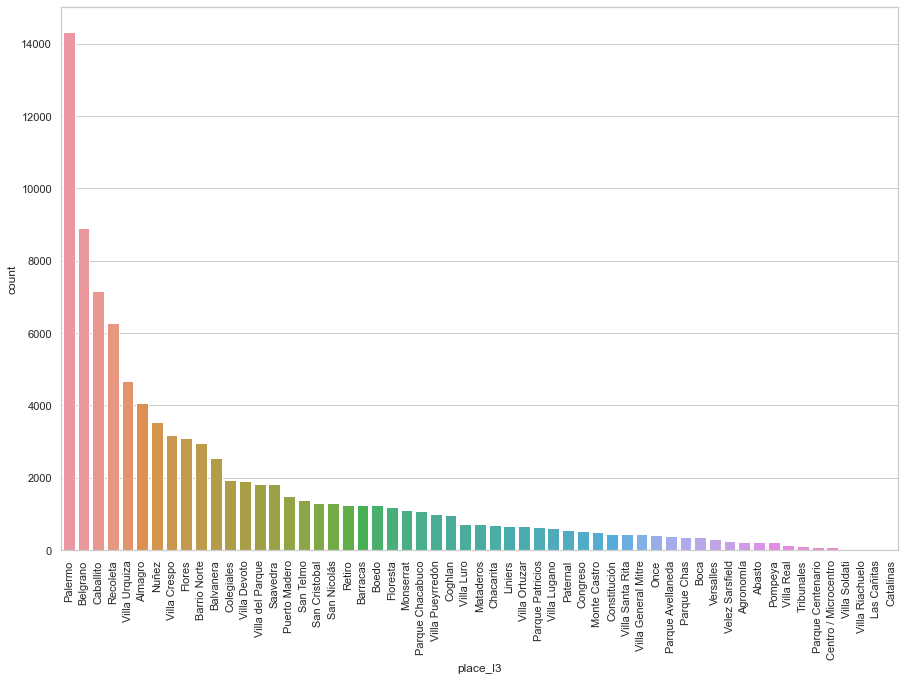

In [462]:
#graficamos barplot de place_l3
plt.figure(figsize=(15, 10))
sns.countplot(x='place_l3', data=ds_propiedades, order=ds_propiedades.place_l3.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [463]:
ds_propiedades.property_type.value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

<h5>Apariciones de cada tipo de propiedad </h5>


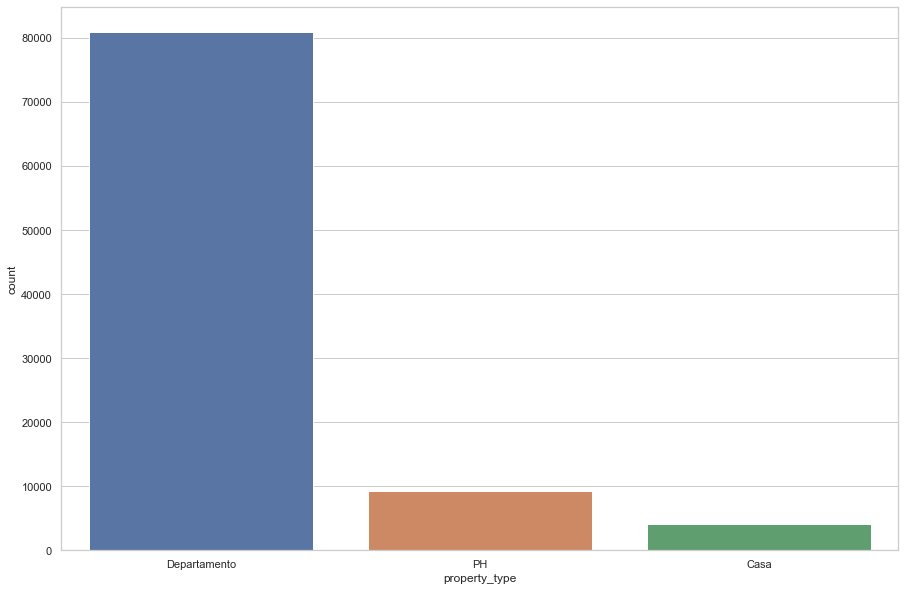

In [464]:
#graficamos barplot de property_types
plt.figure(figsize=(15, 10))
sns.countplot(x='property_type', data=ds_propiedades, order=ds_propiedades.property_type.value_counts().index)

plt.show()

Siguiendo con el análisis gráfico de las distribuciones de las variables, vemos como se distribuye cada una


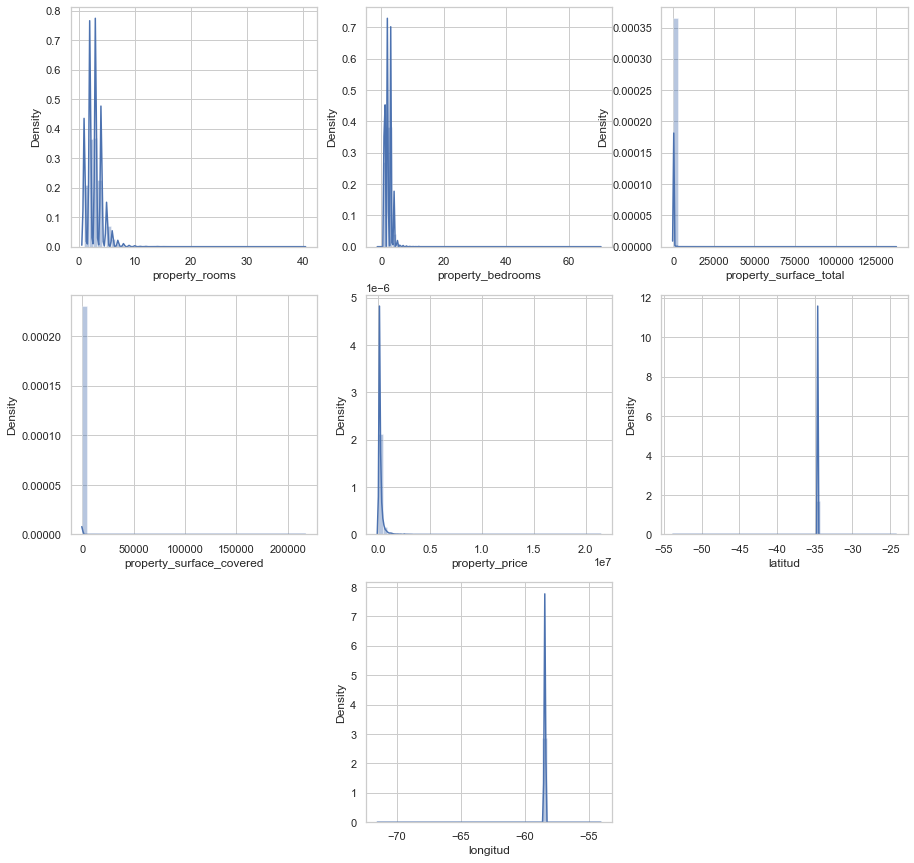

In [465]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.distplot(ds_propiedades['property_rooms'], ax=axs[0, 0])
sns.distplot(ds_propiedades['property_bedrooms'], ax=axs[0, 1])
sns.distplot(ds_propiedades['property_surface_total'], ax=axs[0, 2])
sns.distplot(ds_propiedades['property_surface_covered'], ax=axs[1, 0])
sns.distplot(ds_propiedades['property_price'], ax=axs[1, 1])
sns.distplot(ds_propiedades['latitud'], ax=axs[1, 2])
sns.distplot(ds_propiedades['longitud'], ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

plt.show()

<h4>Análisis de las correlaciones</h4>

In [466]:
ds_propiedades[variables_cuantitativas].corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
property_rooms,1.000000,0.871940,0.067211,0.076097,0.488934,0.005521,-0.008324
property_bedrooms,0.871940,1.000000,0.067702,0.075075,0.425386,0.003162,-0.008556
property_surface_total,0.067211,0.067702,1.000000,0.604311,0.085235,0.025348,-0.015056
property_surface_covered,0.076097,0.075075,0.604311,1.000000,0.056238,0.002352,-0.001155
property_price,0.488934,0.425386,0.085235,0.056238,1.000000,0.016635,0.023314
latitud,0.005521,0.003162,0.025348,0.002352,0.016635,1.000000,-0.239235
longitud,-0.008324,-0.008556,-0.015056,-0.001155,0.023314,-0.239235,1.000000


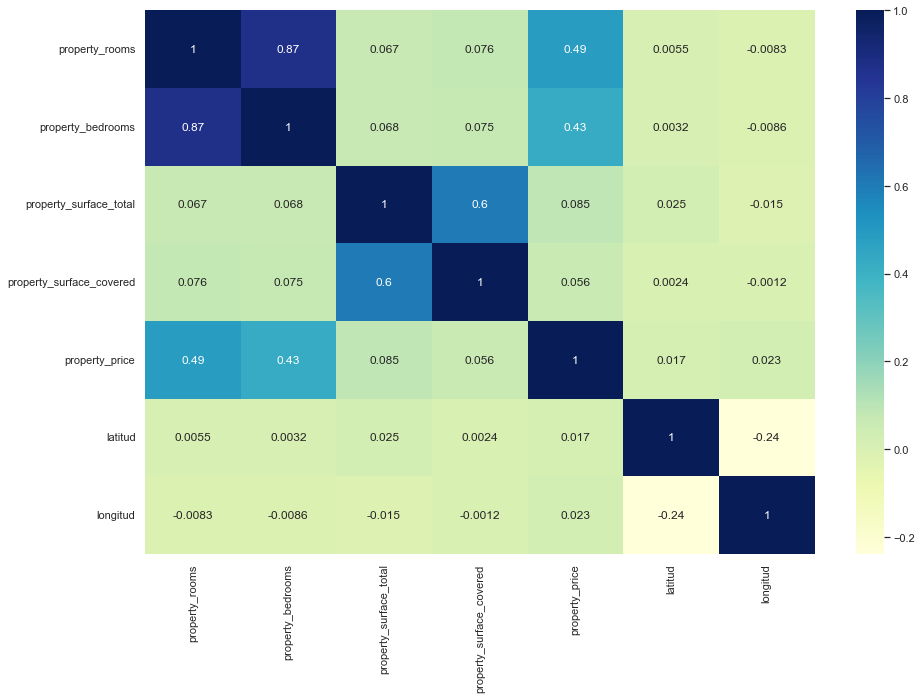

In [467]:
plt.figure(figsize=(15, 10))
sns.heatmap(ds_propiedades[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu")
plt.show()

In [468]:
#Hacemos una variable a modo de checkpoint del dataset total para no requerir correr todo el codigo de nuevo
ds_propiedades_analisis_exploratorio = ds_propiedades.copy()

### <h2>Separación entre Train y Test (80%/20%)</h2>

Hacemos un split del dataset en train y test, con un 80% de los datos para train y 20% para test. Luego hacemos un análisis de las distribuciones de las variables en train y test para verificar que se comporten similar y no haya habido una separacion al azar infortuna.

In [469]:
#levantamos el dataset de propiedades ya analizado
ds_propiedades = ds_propiedades_analisis_exploratorio.copy()

In [470]:
from sklearn.model_selection import train_test_split

ds_propiedades_train, ds_propiedades_test = train_test_split(ds_propiedades, test_size = 0.20, random_state=1)

<h2>Hacemos el analisis de los dos datasets</h2>

<h4>Variables cuantitativas</h4>

Comenzamos con el analisis de las variables cuantitativas en TRAIN, calculando las medidas de resumen para cada una de ellas.

In [471]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price", "latitud", "longitud"]
ds_variables_cuantitativas = ds_propiedades_train[variables_cuantitativas]
ds_variables_cuantitativas_resumen_train = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen_train.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades_train[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen_train = ds_variables_cuantitativas_resumen_train.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen_train.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen_train

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.821728,2.015891,108.843508,88.217949,225956.331835,-34.591261,-58.449904
q1,2.000000,1.000000,45.000000,40.000000,95000.000000,-34.615979,-58.466524
mediana,3.000000,2.000000,65.000000,58.000000,143900.000000,-34.595790,-58.439153
q3,4.000000,3.000000,104.000000,88.000000,235000.000000,-34.577378,-58.409025
moda,3.000000,1.000000,50.000000,40.000000,110000.000000,-34.541250,-58.472966


Comparacion grafica de todas las variables cuantitativas en el dataset completo, train y test. Hacemos un boxplot observar que las distribuciones de las variables son similares en train y test.
Este grafico nos ayudara luego para ver las diferencias entre train y test en el desarrollo del trabajo.

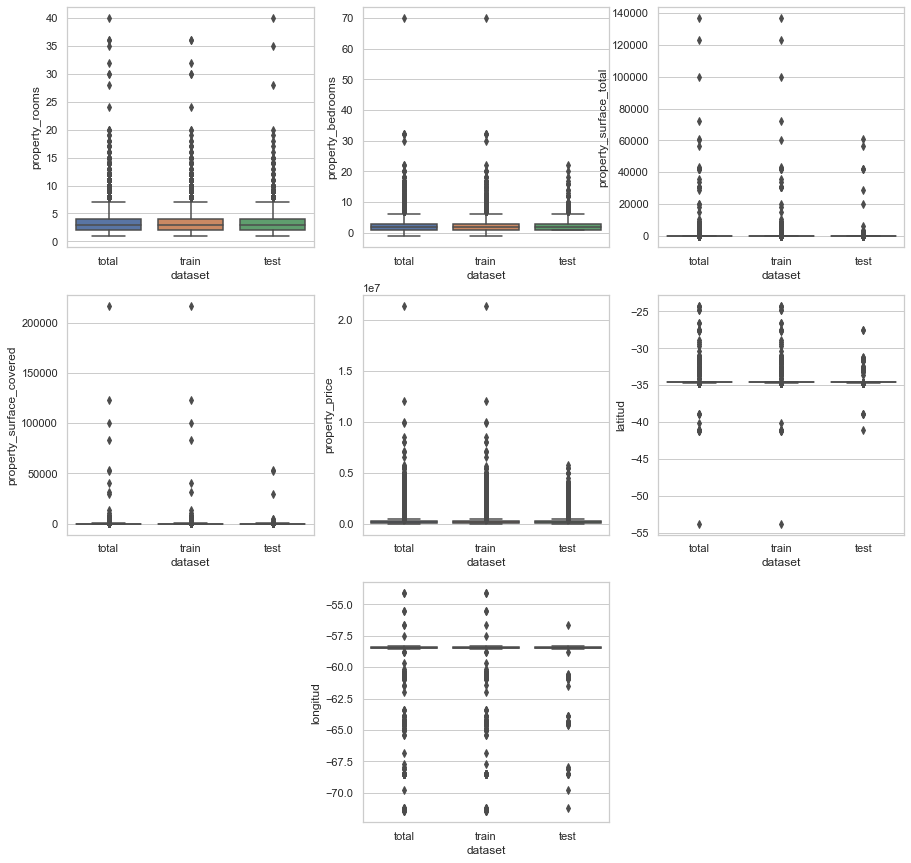

<Figure size 1080x720 with 0 Axes>

In [473]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

datos_cuantitativos = ds_propiedades.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos['dataset'] = 'total'
datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos, datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

plt.show()

<h4>Variables cualitativas</h4>

Comenzamos por property_type

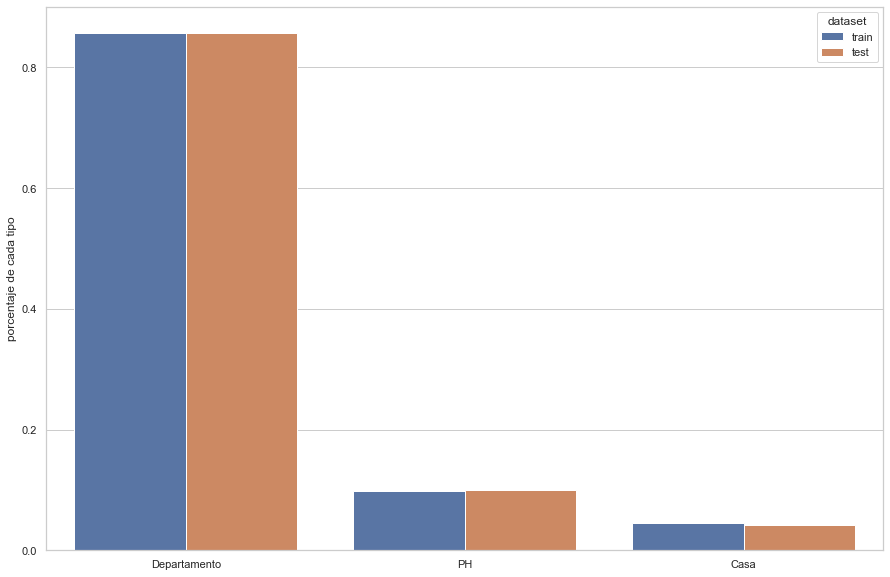

In [474]:
df_property_type_train = ds_propiedades_train.property_type.value_counts(normalize=True).to_frame(name="porcentaje de cada tipo")
df_property_type_test = ds_propiedades_test.property_type.value_counts(normalize=True).to_frame(name="porcentaje de cada tipo")

df_property_type_train['dataset'] = 'train'
df_property_type_test['dataset'] = 'test'

df_property_type = pd.concat([df_property_type_train, df_property_type_test])

plt.figure(figsize=(15, 10))
sns.barplot(data=df_property_type, x=df_property_type.index, y='porcentaje de cada tipo', hue='dataset')

plt.show()

Ahora repetimos para place_l3 (barrio)

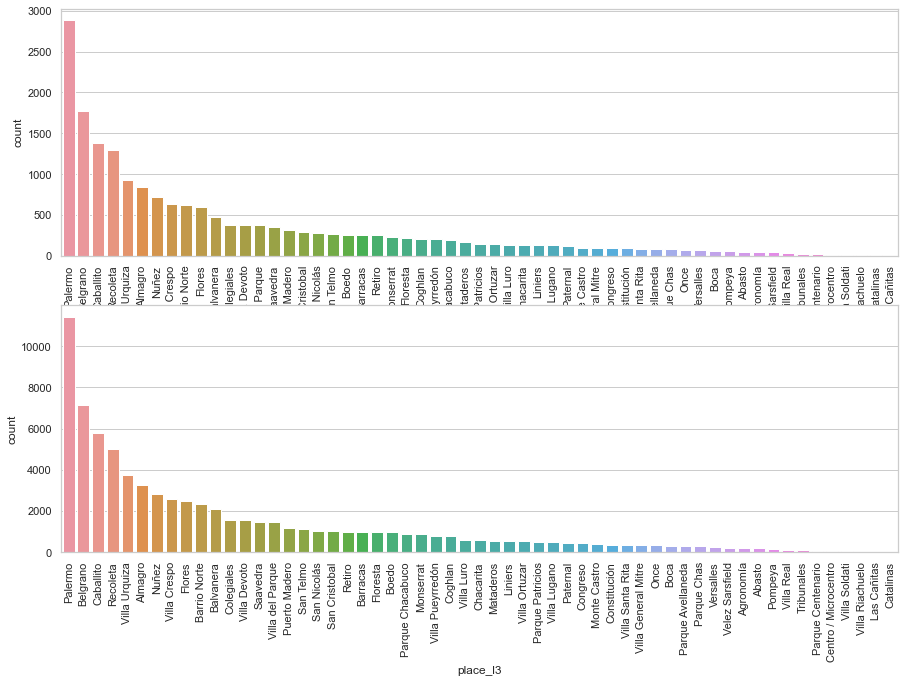

In [475]:
from matplotlib.pyplot import xlabel, ylabel


fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(x='place_l3', data=ds_propiedades_test, order=ds_propiedades_test.place_l3.value_counts().index, ax=axs[0])
sns.countplot(x='place_l3', data=ds_propiedades_train, order=ds_propiedades_train.place_l3.value_counts().index, ax=axs[1])

axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)

plt.show()

<h4>Analisis de las correlaciones</h4>

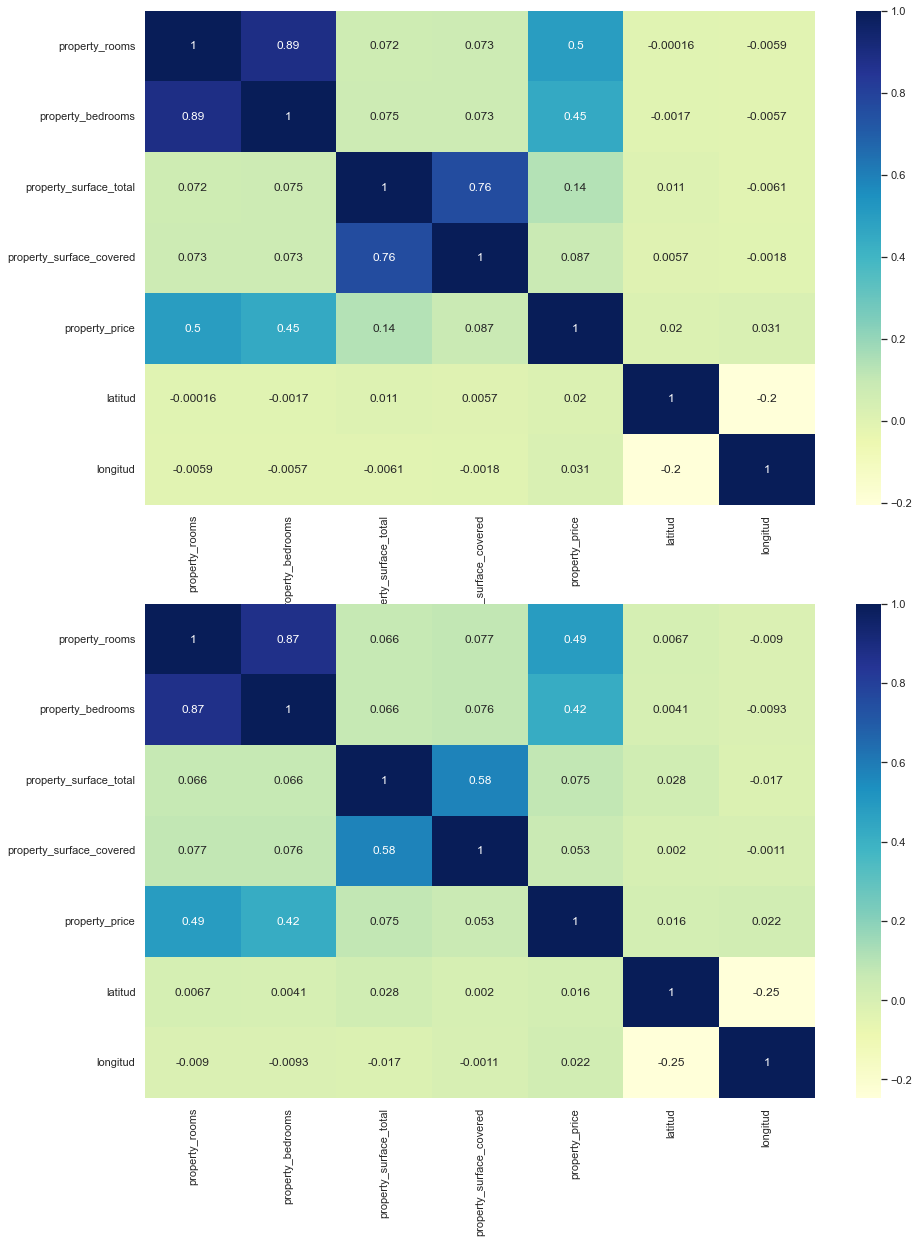

In [476]:
fig, axs = plt.subplots(2, 1, figsize=(15, 20))

sns.heatmap(ds_propiedades_test[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu", ax=axs[0])
sns.heatmap(ds_propiedades_train[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu", ax=axs[1])

plt.show()


Luego del analisis de ambos datasets, podemos ver que las correlaciones son muy similares, por lo que no hay que preocuparse por el split realizado.

In [477]:
# checkpoint de los datasets previamente analizados
ds_propiedades_test_analizado = ds_propiedades_test.copy()
ds_propiedades_train_analizado = ds_propiedades_train.copy()


<h2>Conclusiones sobre los datos </h2>
Correlaciones: Podemos ver que las que más estan relacionadas son:
    <br>* La cantidad de habitaciones con la cantidad de dormitorios, esto nos parece bien porque las viviendas más grandes, suelen tener más dormitorios
    <br>* La superficie total con la superficie cubierta, lo que tiene sentido ya que la superficie total incluye a la superficie cubierta. 
    <br>* La cantidad de habitaciones y el precio, esto no nos sorprende debido a que normalmente a mayor cantidad de habitaciones, más grande es la vivienda y más cara se vuelve (lo mismo con la cantidad de dormitorios y el precio)

Por otro lado, nos sorprende que no haya correlacion entre la superficie y el precio. Esto puede deberse a que hay viviendas grandes que son baratas al no estar en un barrio muy cotizado y otras pequeñas que son muy caras. <br>

En la distribución de tipo de vivienda notamos gran cantidad de departamentos frente a la cantidad de casa y PHs. Esto puede deberse a que la mayoría de las viviendas en Capital Federal son departamentos. <br>  <br>
En la distribución de localidades, notamos una gran disparidad entre estas. Los lugares con mayor cantidad de viviendas en venta son Palermo, Belgrano, Caballito y Recoleta. Esto puede deberse a que son las zonas mas céntricas de la ciudad. <br>  <br>
Notamos que la media de la logitud y la longitud, no es el centro geografico de la ciudad (Caballito) si no que esta más cerca de Palermo, esto se debe a que la mayoría de los anuncios de venta publicados son de viviendas en este barrio. <br>  <br>

### <h2>Búsqueda de Outliers </h2>

In [478]:
ds_propiedades_test = ds_propiedades_test_analizado.copy()
ds_propiedades_train = ds_propiedades_train_analizado.copy()

Para hacer el análisis univariado de las variables cuantitativas hacemos gráficos estas para ver su distribución de sus datos

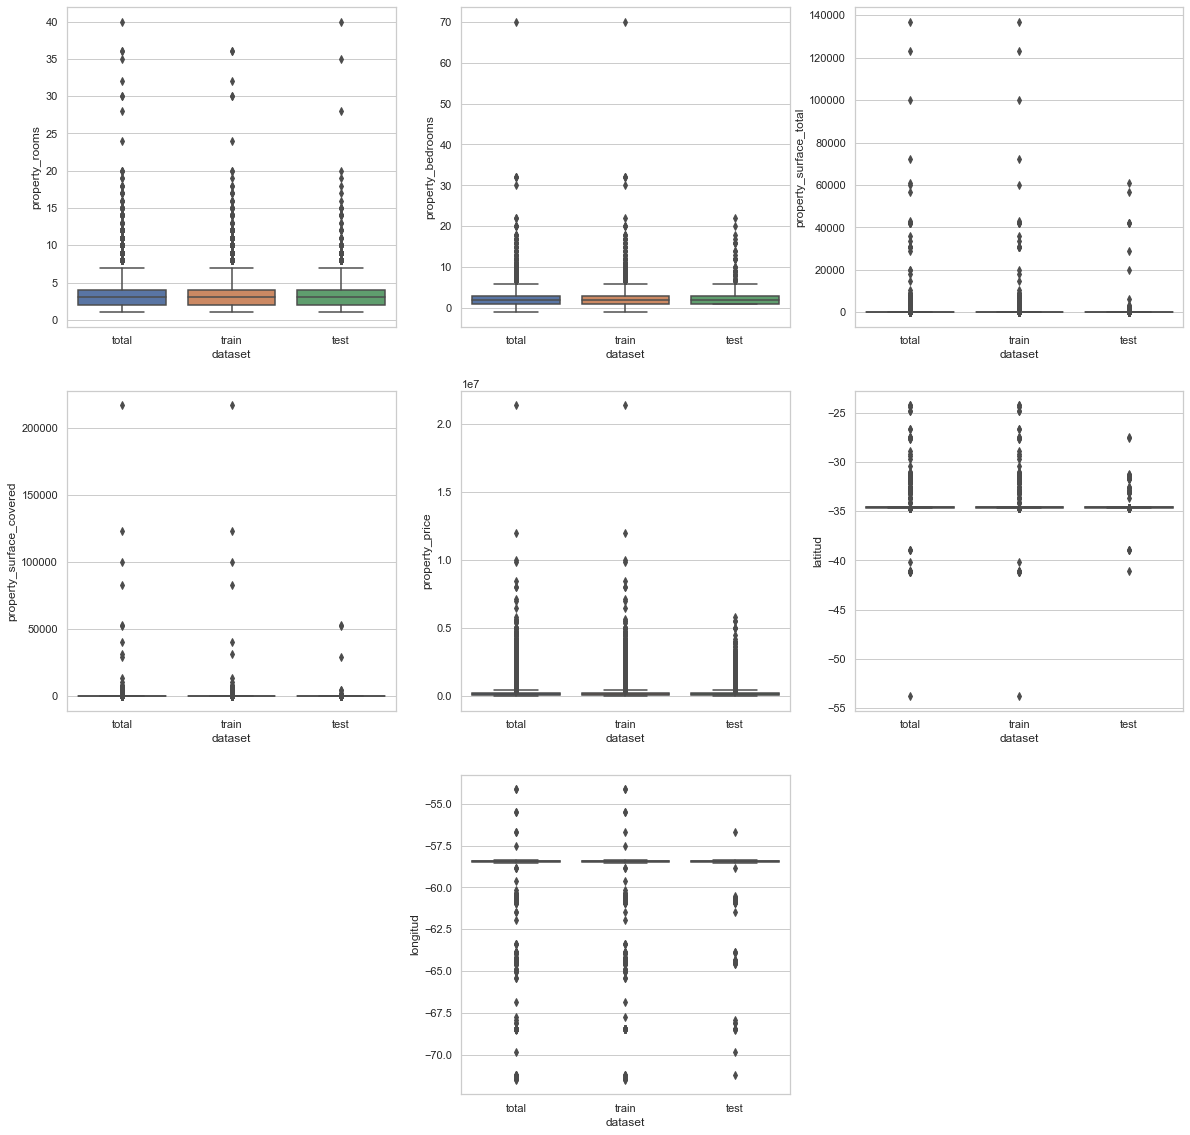

<Figure size 1080x720 with 0 Axes>

In [479]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

datos_cuantitativos = ds_propiedades.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos['dataset'] = 'total'
datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos, datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

# plt.boxplot(x=ds_propiedades_train['property_rooms'])

plt.show()

Podemos ver en los boxplot superiores que todas las viariables cuantitativas tienen más de un posible outlier. Para poder detectar con mayor precisión cuales pueden ser estos, procederemos a calcular los z-score

In [480]:
ds_propiedades_test_zscore = ds_propiedades_test.copy()
ds_propiedades_train_zscore = ds_propiedades_train.copy()

In [481]:
#analisis de Zscore en el dataset de train
for columna in variables_cuantitativas:
    columna_actual = ds_propiedades_train_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_train_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_train_zscore

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_rooms,z_property_bedrooms,z_property_surface_total,z_property_surface_covered,z_property_price,z_latitud,z_longitud
60535,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,0.831636,0.865657,0.050903,0.054169,0.727165,0.171620,0.008716
74300,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,0.579983,0.893614,0.058551,0.039578,0.242207,0.046912,0.020694
20393,-34.567858,-58.446164,Belgrano,Departamento,9.0,3.0,390.0,390.0,1250000.0,4.360686,0.865657,0.279761,0.282915,3.181665,0.123944,0.012765
20578,NaN,NaN,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,0.125826,0.013979,0.061536,0.038641,0.425518,NaN,NaN
38282,-34.686350,-58.477110,Villa Lugano,PH,3.0,2.0,104.0,54.0,120000.0,0.125826,0.013979,0.004819,0.032079,0.329202,0.503583,0.092850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-34.619406,-58.451999,Caballito,Departamento,2.0,1.0,42.0,38.0,96000.0,0.579983,0.893614,0.066512,0.047078,0.403769,0.149052,0.007151
73349,-34.581411,-58.408848,Palermo,Departamento,3.0,2.0,71.0,65.0,329000.0,0.125826,0.013979,0.037656,0.021766,0.320153,0.052167,0.140119
50057,-34.580851,-58.413747,Palermo,Departamento,3.0,2.0,78.0,73.0,219900.0,0.125826,0.013979,0.030690,0.014267,0.018817,0.055134,0.123400
5192,-34.584074,-58.422690,Palermo,Departamento,4.0,3.0,55.0,55.0,170000.0,0.831636,0.865657,0.053576,0.031141,0.173854,0.038061,0.092878


Sabemos que los que tienen un Z-Score mayor a módulo 3 son Outliers

Ahora hacemos lo mismo con los datos de train

In [482]:
#analisis de Zscore en el dataset de test
for columna in variables_cuantitativas:
    columna_actual = ds_propiedades_test_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_test_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_test_zscore

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_rooms,z_property_bedrooms,z_property_surface_total,z_property_surface_covered,z_property_price,z_latitud,z_longitud
47135,-34.554682,-58.478302,Saavedra,Departamento,3.0,2.0,127.0,78.0,219000.0,0.118216,0.008730,0.019321,0.014673,0.027408,0.251297,0.099434
22864,-34.610723,-58.394176,Congreso,Departamento,3.0,2.0,NaN,62.0,97500.0,0.118216,0.008730,NaN,0.041384,0.425471,0.122468,0.189552
76296,-34.610046,-58.361382,Puerto Madero,Departamento,3.0,2.0,171.0,171.0,1000000.0,0.118216,0.008730,0.069596,0.140589,2.531334,0.117953,0.302205
54604,-34.629075,-58.367129,Boca,Departamento,2.0,1.0,41.0,38.0,60000.0,0.565417,0.916827,0.078944,0.081452,0.548330,0.244869,0.282464
89065,-34.575360,-58.441559,Colegiales,Departamento,2.0,1.0,47.0,42.0,115150.0,0.565417,0.916827,0.072088,0.074774,0.367645,0.113385,0.026784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28310,-34.613398,-58.359734,Puerto Madero,Departamento,4.0,3.0,177.0,160.0,1090000.0,0.801850,0.899368,0.076452,0.122224,2.826195,0.140309,0.307868
54642,-34.604427,-58.418079,Almagro,Departamento,1.0,NaN,32.0,30.0,68500.0,1.249051,NaN,0.089227,0.094807,0.520482,0.080475,0.107441
51333,-34.638328,-58.473294,Floresta,Departamento,1.0,NaN,41.0,27.0,58900.0,1.249051,NaN,0.078944,0.099816,0.551934,0.306581,0.082231
86137,-34.592111,-58.432919,Palermo,Departamento,1.0,1.0,40.0,37.0,81000.0,1.249051,0.916827,0.080086,0.083121,0.479529,0.001664,0.056463


Borramos a todos las observaciones cuyo Z-Score es mayor a 3 <br>

In [483]:
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_covered'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_price'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_latitud'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_longitud'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_rooms'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_bedrooms'] > 3].index, inplace=True)

In [484]:
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_covered'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_price'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_latitud'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_longitud'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_rooms'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_bedrooms'] > 3].index, inplace=True)

In [485]:
ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_zscore.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_zscore.index)]

ds_propiedades_train_zscore.shape

(73313, 16)

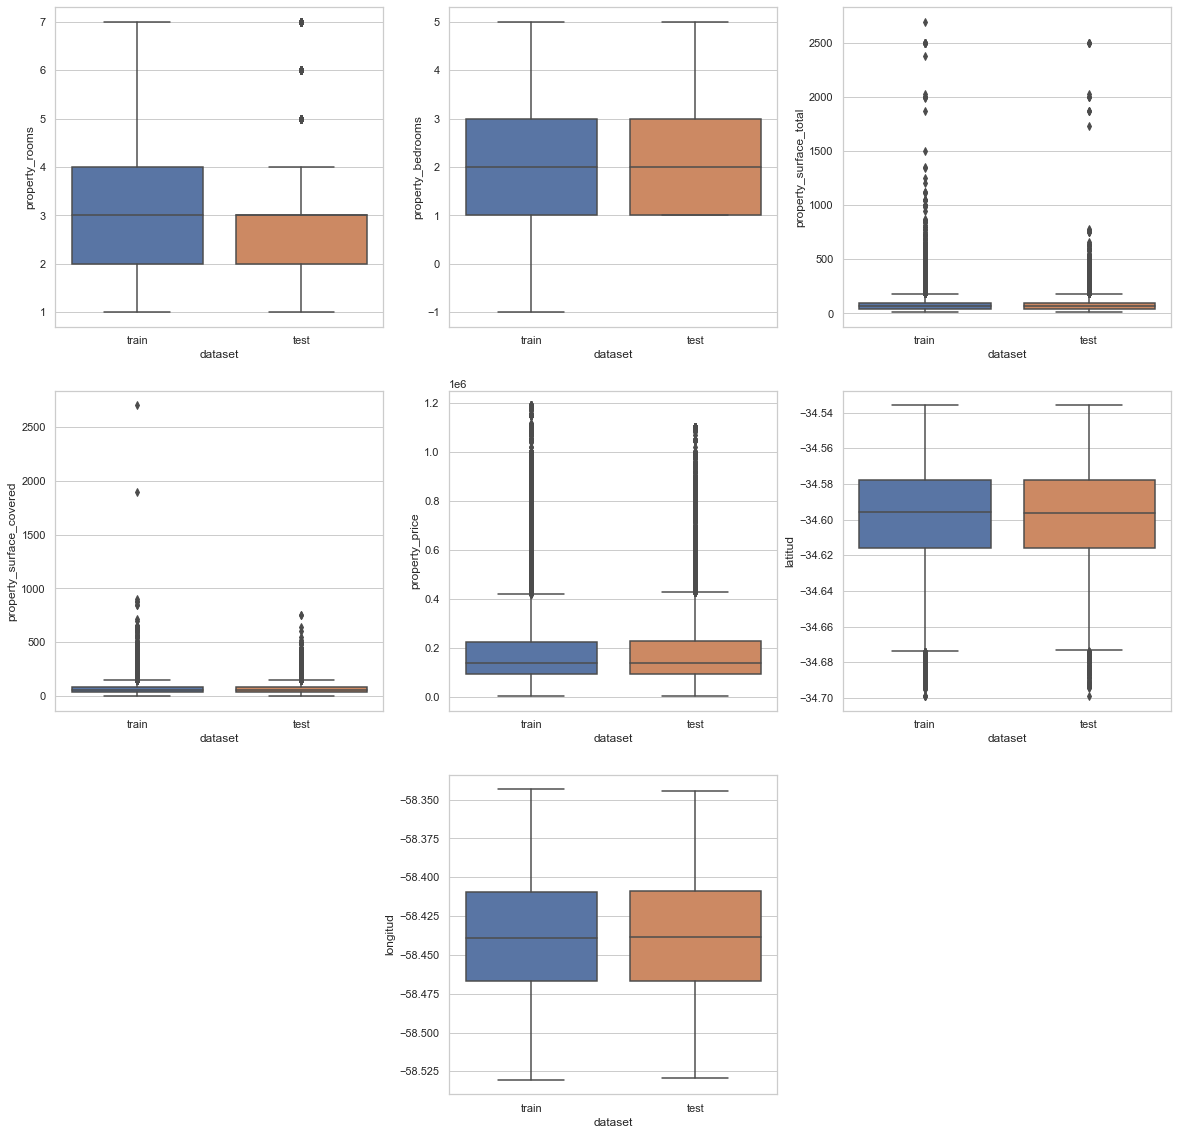

<Figure size 1080x720 with 0 Axes>

In [486]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

plt.show()

Vemos que en el caso de las superficies cubiertas y totales, todavia quedan muchisimos outliers, por lo que volvemos a calcular los Z-Score de estas variables y realizar el filtrado

In [487]:
ds_propiedades_test_zscore = ds_propiedades_test.copy()
ds_propiedades_train_zscore = ds_propiedades_train.copy()

for columna in ['property_surface_total', 'property_surface_covered']:
    columna_actual = ds_propiedades_train_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_train_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

for columna in ['property_surface_total', 'property_surface_covered']:
    columna_actual = ds_propiedades_test_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_test_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_covered'] > 3].index, inplace=True)

ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_covered'] > 3].index, inplace=True)

ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_zscore.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_zscore.index)]


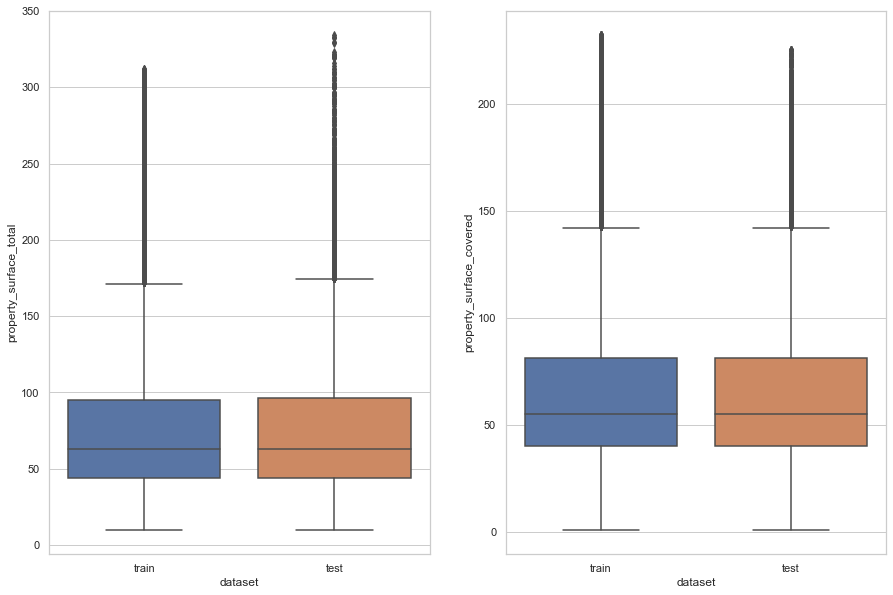

<Figure size 1080x720 with 0 Axes>

In [488]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

superficies_train = ds_propiedades_train.copy()[[ 'property_surface_total', 'property_surface_covered']]
superficies_test = ds_propiedades_test.copy()[[ 'property_surface_total', 'property_surface_covered']]

superficies_train['dataset'] = 'train'
superficies_test['dataset'] = 'test'

superficies = pd.concat([superficies_train, superficies_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=superficies, x='dataset', y='property_surface_total', ax=axs[0])
sns.boxplot(data=superficies, x='dataset', y='property_surface_covered', ax=axs[1])

plt.show()

A traves del grafico notamos que existe una propiedad con un valor de bedrooms -1 en el train, al revisar el caso, notamos que perfectamente puede ser un error de tipeo en base a los datos y que el valor correcto sea 1

In [489]:
ds_propiedades_train[ds_propiedades_train['property_bedrooms'] < 0]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
82905,-34.577595,-58.495185,Villa Urquiza,Departamento,2.0,-1.0,61.0,43.0,125000.0


In [490]:
ds_propiedades_train.at[82905, 'property_bedrooms'] = 1

Ahora verificamos casos donde la cantidad de bedrooms sea mayor a la de rooms (lo cual sabemos que no es posible ya que los dormitorios son parte de los ambientes).
Comenzando por hacer un scatterplot entre estas dos variables para analizar mejor.

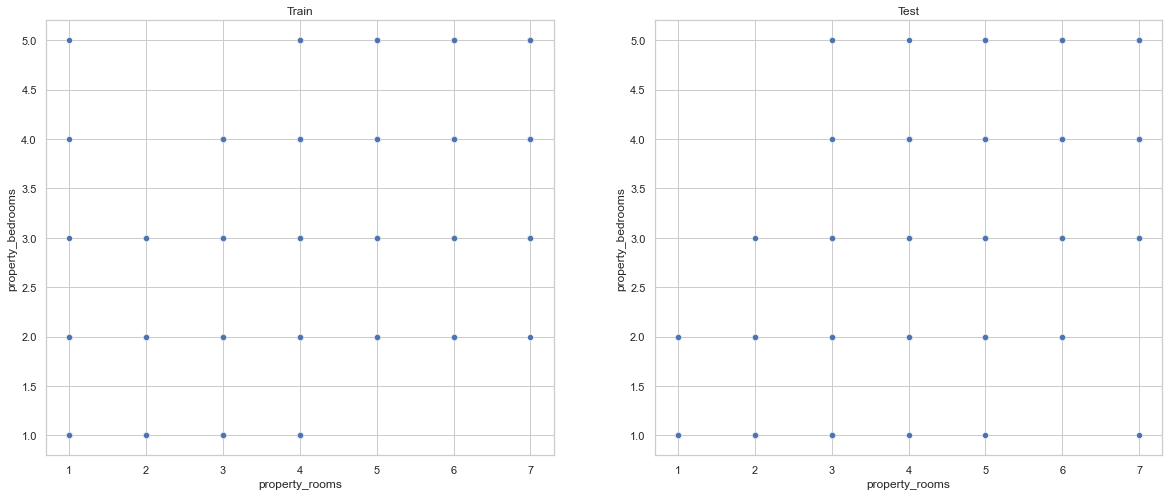

In [491]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_bedrooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_bedrooms', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()

In [492]:
bedrooms_rooms_erroneas_train = (ds_propiedades_train[ds_propiedades_train['property_bedrooms'] > ds_propiedades_train['property_rooms']])
bedrooms_rooms_erroneas_test = (ds_propiedades_test[ds_propiedades_test['property_bedrooms'] > ds_propiedades_test['property_rooms']])

print(f'La cantidad de filas con más habitaciones que cuartos en el dataset de train son: {bedrooms_rooms_erroneas_train.shape[0]}')
print(f'La cantidad de filas con más habitaciones que cuartos en el dataset de test son: {bedrooms_rooms_erroneas_test.shape[0]}')

La cantidad de filas con más habitaciones que cuartos en el dataset de train son: 71
La cantidad de filas con más habitaciones que cuartos en el dataset de test son: 10


Como son cantidades poco significativas, las eliminamos

In [493]:
ds_propiedades_train.drop(bedrooms_rooms_erroneas_train.index, inplace=True)
ds_propiedades_test.drop(bedrooms_rooms_erroneas_test.index, inplace=True)

Al volver a graficar, notamos que ahora el grafico tine sentido y no hay viviendas con mas dormitorios que habitaciones

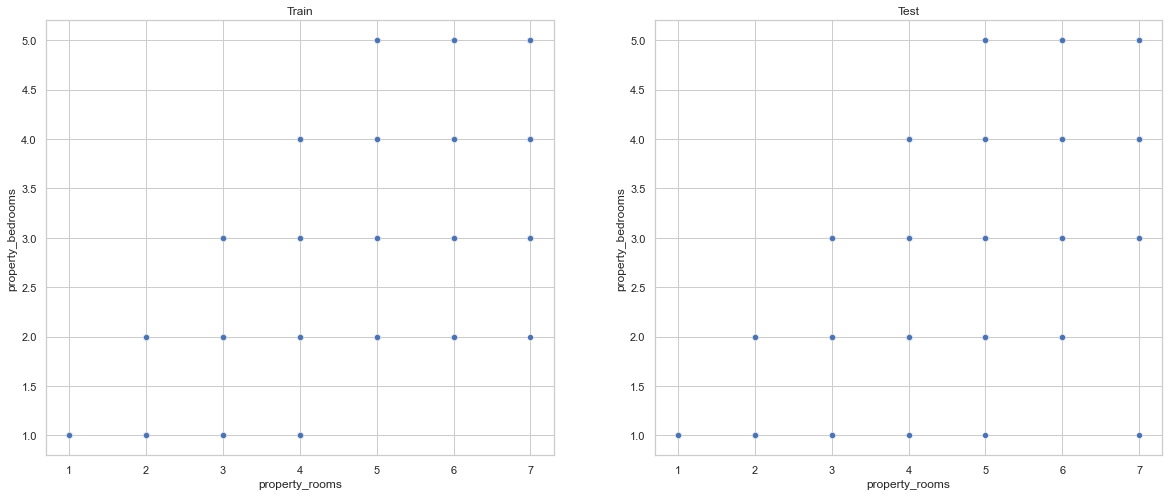

In [494]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_bedrooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_bedrooms', ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

Analizamos tambien el caso donde la superfice cubierta sea mayor a la total, lo cual no puede suceder.

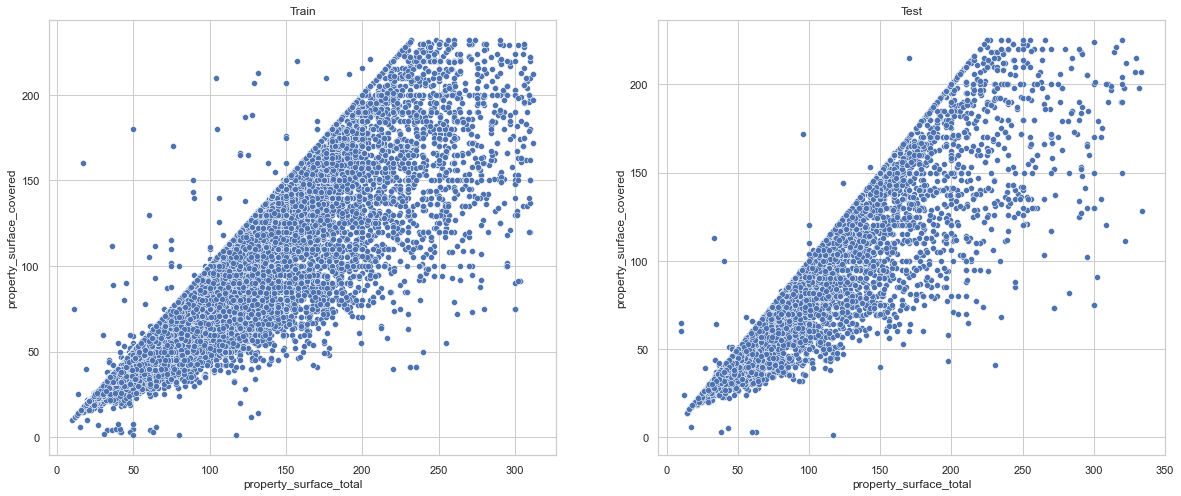

In [495]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_surface_total', y='property_surface_covered', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_surface_total', y='property_surface_covered', ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

Decidimos eliminarlos

In [496]:
total_cubierta_erronea_train = (ds_propiedades_train[ds_propiedades_train['property_surface_total'] < ds_propiedades_train['property_surface_covered']])
total_cubierta_erronea_test = (ds_propiedades_test[ds_propiedades_test['property_surface_total'] < ds_propiedades_test['property_surface_covered']])
print(total_cubierta_erronea_train.shape)
print(total_cubierta_erronea_test.shape)

(108, 9)
(34, 9)


In [497]:
ds_propiedades_train.drop(total_cubierta_erronea_train.index, inplace=True)
ds_propiedades_test.drop(total_cubierta_erronea_test.index, inplace=True)

Volvemos a graficar

Text(0.5, 1.0, 'Test')

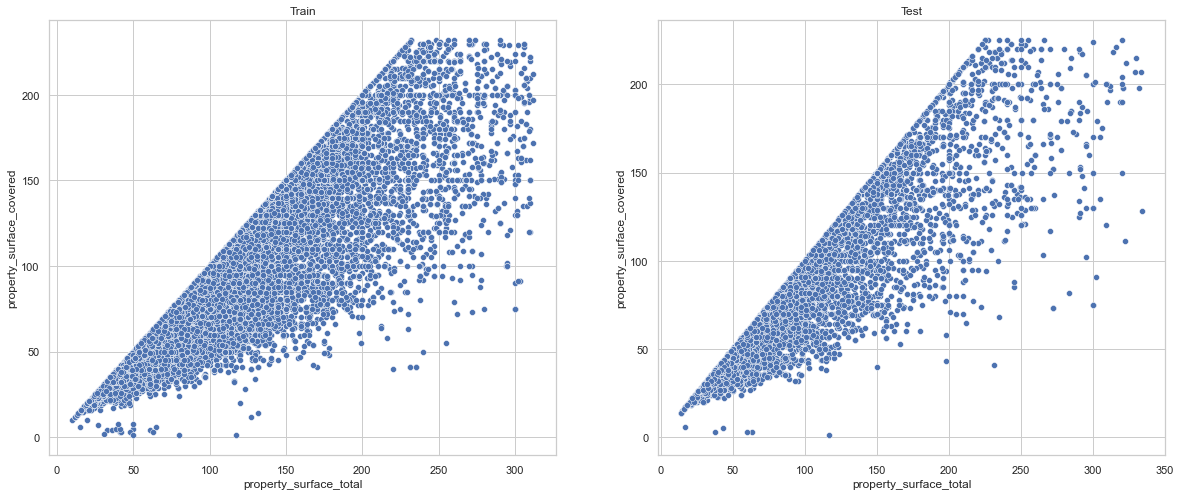

In [498]:

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_surface_total', y='property_surface_covered', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_surface_total', y='property_surface_covered', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')

Comparamos las relacion entre ambientes y superficies.

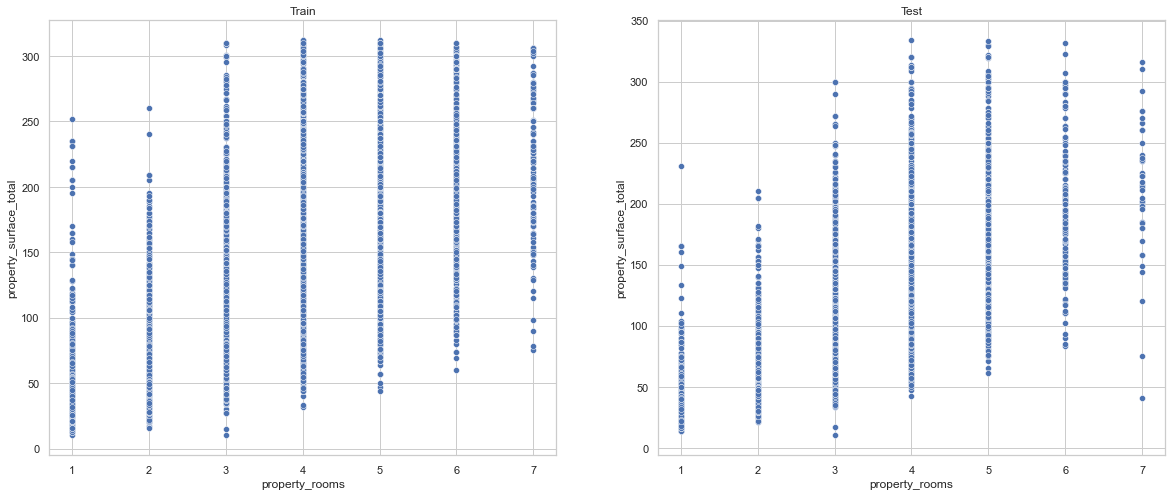

In [499]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_surface_total', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_surface_total', ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()

Notamos que están muy relacionadas y que hay datos que podrían ser Outliers

Ahora vamos a detectar a los Outliers de forma multivariada usando la distancia de Mahalanobis para diferentes variables de nuestro dataset <br>
Para poder hacer este análisis, dejamos de lado las filas que tengan algún elemento faltante

In [500]:
#Nos creamos un nuevo dataset sin NaNs para poner las distancias de Mahalanobis entre las variables
ds_propiedades_train_mahal = ds_propiedades_train.dropna().copy()
ds_propiedades_test_mahal = ds_propiedades_test.dropna().copy()

#Para recuperar los NaNs
ds_propiedades_train_nans = ds_propiedades_train[ds_propiedades_train.isna().any(axis=1)].copy()
ds_propiedades_test_nans = ds_propiedades_test[ds_propiedades_test.isna().any(axis=1)].copy()

In [501]:
import scipy as sc
import numpy as np

def mahalanobis(data):
    sample_X = data.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = data - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    mahal_dists = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])
    return mahal_dists

Decidimos emplear el algoritmo para las variables: 'property_surface_covered' y 'property_rooms' ya que vemos que están relacionadas

In [502]:
ds_propiedades_train_mahal['mahal_sup-rooms'] = mahalanobis(ds_propiedades_train_mahal[['property_surface_covered', 'property_rooms']])
ds_propiedades_train_mahal.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,mahal_sup-rooms
60535,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,4.532846
74300,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,0.653228
38282,-34.686350,-58.477110,Villa Lugano,PH,3.0,2.0,104.0,54.0,120000.0,0.784287
35433,-34.610319,-58.502221,Villa Devoto,PH,2.0,1.0,36.0,31.0,85000.0,1.087369
22942,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,0.014790


In [503]:
ds_propiedades_test_mahal['mahal_sup-rooms'] = mahalanobis(ds_propiedades_test_mahal[['property_surface_covered', 'property_rooms']])
ds_propiedades_test_mahal.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,mahal_sup-rooms
47135,-34.554682,-58.478302,Saavedra,Departamento,3.0,2.0,127.0,78.0,219000.0,0.060697
76296,-34.610046,-58.361382,Puerto Madero,Departamento,3.0,2.0,171.0,171.0,1000000.0,18.266910
54604,-34.629075,-58.367129,Boca,Departamento,2.0,1.0,41.0,38.0,60000.0,0.779072
89065,-34.575360,-58.441559,Colegiales,Departamento,2.0,1.0,47.0,42.0,115150.0,0.682452
7579,-34.615311,-58.494569,Monte Castro,PH,3.0,2.0,63.0,55.0,119900.0,0.707396


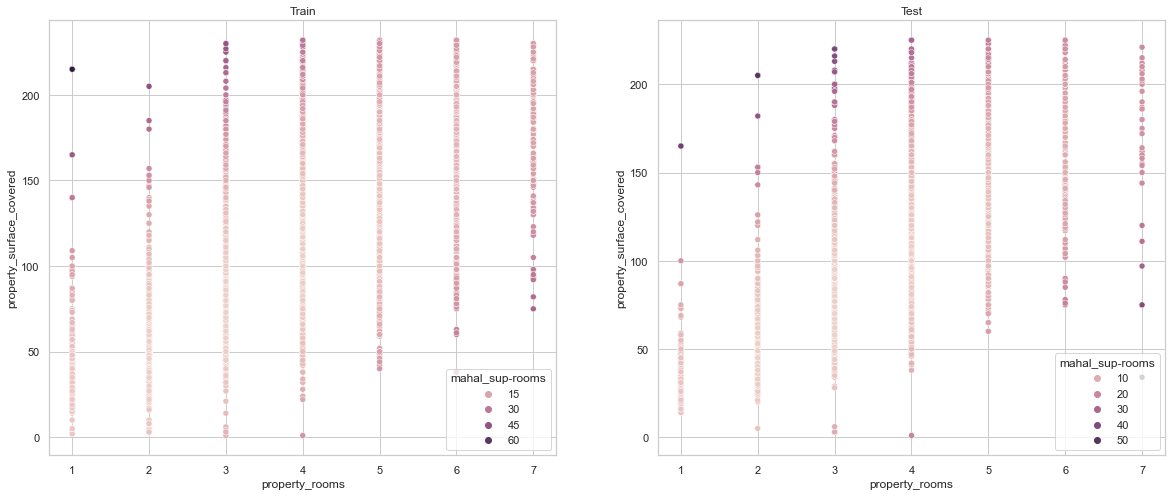

In [504]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train_mahal, x='property_rooms', y='property_surface_covered', hue='mahal_sup-rooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test_mahal, x='property_rooms', y='property_surface_covered', hue='mahal_sup-rooms', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

Decidimos que el umbral va a ser 30

In [505]:
ds_propiedades_train_mahal.drop(ds_propiedades_train_mahal[ds_propiedades_train_mahal['mahal_sup-rooms'] > 30].index, inplace=True)
ds_propiedades_test_mahal.drop(ds_propiedades_test_mahal[ds_propiedades_test_mahal['mahal_sup-rooms'] > 30].index, inplace=True)

Volvemos a graficar para ver el resultado de eliminar las distancias mayor al umbral

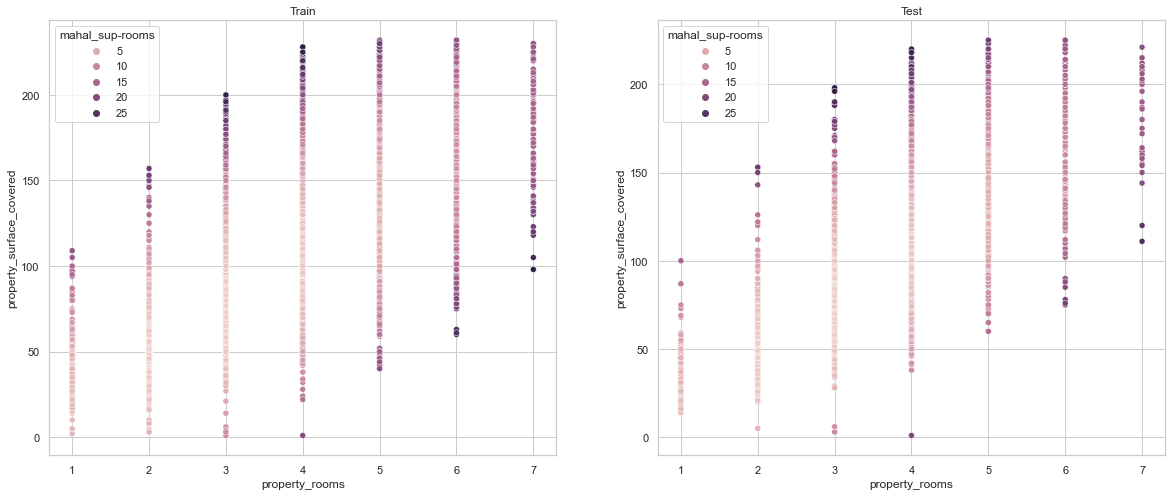

In [506]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train_mahal, x='property_rooms', y='property_surface_covered', hue='mahal_sup-rooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test_mahal, x='property_rooms', y='property_surface_covered', hue='mahal_sup-rooms', ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

Decidimos emplear el algoritmo para las variables: 'property_surface_covered' y 'property_bedrooms' ya que volvemos a notar que estas están relacionadas

In [507]:
ds_propiedades_train_mahal['mahal_bedrooms-sup'] = mahalanobis(ds_propiedades_train_mahal[['property_bedrooms', 'property_surface_covered']])
ds_propiedades_test_mahal['mahal_bedrooms-sup'] = mahalanobis(ds_propiedades_test_mahal[['property_bedrooms', 'property_surface_covered']])

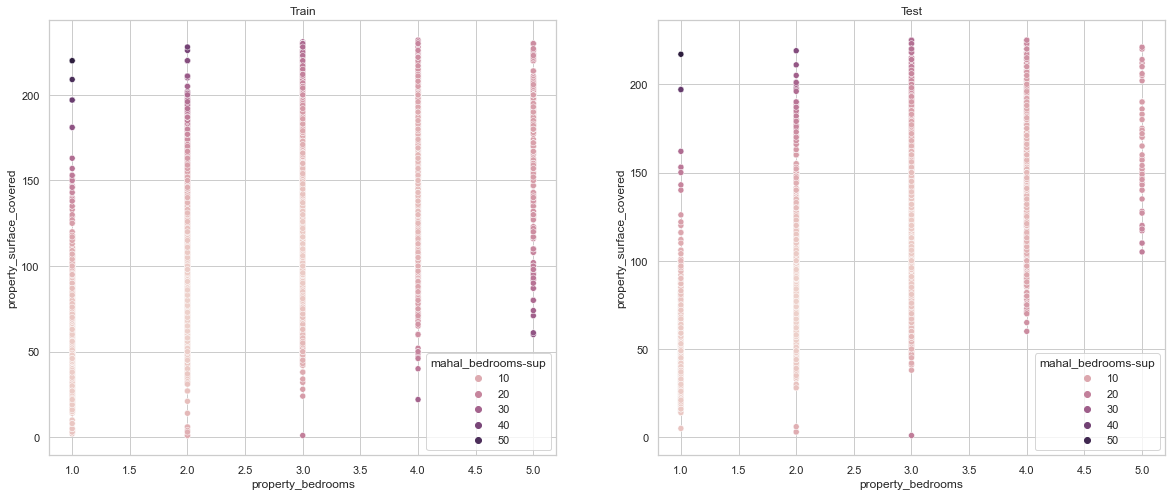

In [508]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train_mahal, x='property_bedrooms', y='property_surface_covered', hue='mahal_bedrooms-sup', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test_mahal, x='property_bedrooms', y='property_surface_covered', hue='mahal_bedrooms-sup', ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

Decidimos que el umbral va a ser 40

In [509]:
ds_propiedades_train_mahal.drop(ds_propiedades_train_mahal[ds_propiedades_train_mahal['mahal_bedrooms-sup'] > 40].index, inplace=True)
ds_propiedades_test_mahal.drop(ds_propiedades_test_mahal[ds_propiedades_test_mahal['mahal_bedrooms-sup'] > 40].index, inplace=True)

Volvemos a graficar para ver el resultado de eliminar las distancias mayor al umbral

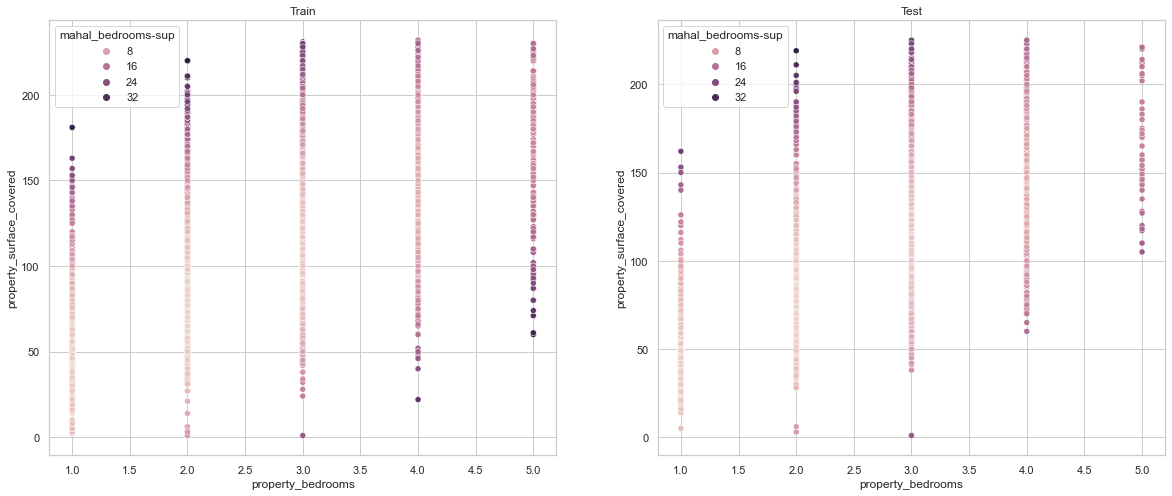

In [510]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train_mahal, x='property_bedrooms', y='property_surface_covered', hue='mahal_bedrooms-sup', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test_mahal, x='property_bedrooms', y='property_surface_covered', hue='mahal_bedrooms-sup', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

In [511]:
ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_mahal.index) | ds_propiedades_train.index.isin(ds_propiedades_train_nans.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_mahal.index) | ds_propiedades_test.index.isin(ds_propiedades_test_nans.index)]

In [512]:
print(f'Cantidad de filas en el dataset antes de Mahalanobis {ds_propiedades_train.shape[0]}')
print(f'Cantidad de filas después de Mahalanobis {ds_propiedades_train_mahal.shape[0]}')

Cantidad de filas en el dataset antes de Mahalanobis 71404
Cantidad de filas después de Mahalanobis 55180


Para notar los Outliers que hasta ahora no pudimos identificar, vamos a aplicar el algoritmo Isolation Forest

In [513]:
#Usamos las columnas que nos interesan para el modelo
ds_propiedades_train_iforest = ds_propiedades_train[['property_rooms', 'property_surface_covered', 'property_bedrooms', 'property_surface_total', 'property_price']].dropna().copy()
ds_propiedades_test_iforest = ds_propiedades_test[['property_rooms', 'property_surface_covered', 'property_bedrooms', 'property_surface_total', 'property_price']].dropna().copy()

In [514]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=5, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [515]:
pred_train = iforest.fit_predict(ds_propiedades_train_iforest)

ds_propiedades_train_iforest['outlier_label'] = pred_train

Las observaciones con outlier_label = -1 son los considerados outliers por el modelo

In [516]:
cantidad_train = ds_propiedades_train_iforest.outlier_label.value_counts()[-1]
porcentaje_train = ds_propiedades_train_iforest.outlier_label.value_counts(normalize=True)[-1]

print(f'Podemos ver entonces que la cantidad de outliers detectados en train por el algoritmo es: {cantidad_train} y el porcentaje es: {round(porcentaje_train, 3)}')

Podemos ver entonces que la cantidad de outliers detectados en train por el algoritmo es: 2864 y el porcentaje es: 0.05


Ahora calculamos lo mismo para el conjunto de test

In [517]:
pred_test = iforest.predict(ds_propiedades_test_iforest)
ds_propiedades_test_iforest['outlier_label'] = pred_test

In [518]:
cantidad_test = ds_propiedades_test_iforest.outlier_label.value_counts()[-1]
porcentaje_test = ds_propiedades_test_iforest.outlier_label.value_counts(normalize=True)[-1]

print(f'Podemos ver entonces que la cantidad de outliers detectados en test por el algoritmo es: {cantidad_test} y el porcentaje es: {round(porcentaje_test, 3)}')

Podemos ver entonces que la cantidad de outliers detectados en test por el algoritmo es: 712 y el porcentaje es: 0.049


Ahora hacemos un pairplot de todas las variables, viendo donde se situaron los outliers detectados

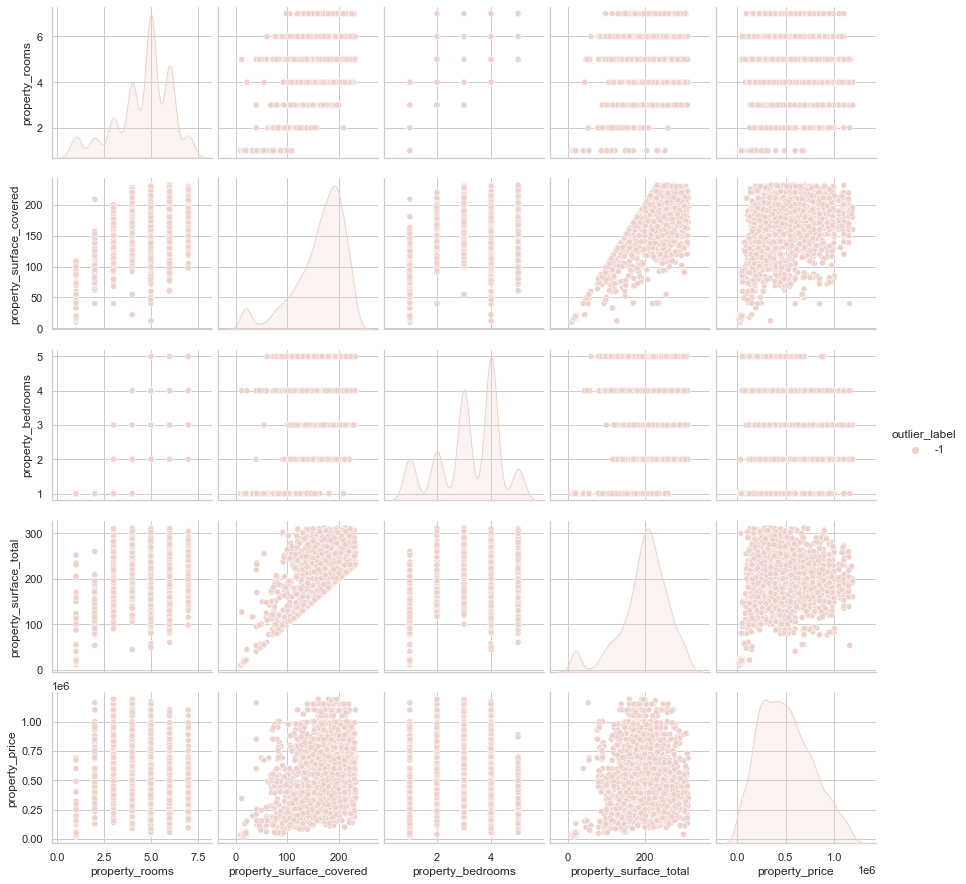

In [519]:
sns.pairplot(ds_propiedades_train_iforest[ds_propiedades_train_iforest.outlier_label==-1], hue='outlier_label', diag_kind='kde', height=2.5)

plt.show()

In [ ]:
ds_propiedades_train_iforest.drop(ds_propiedades_train_iforest[ds_propiedades_train_iforest.outlier_label == -1].index, inplace=True)
ds_propiedades_test_iforest.drop(ds_propiedades_test_iforest[ds_propiedades_test_iforest.outlier_label == -1].index, inplace=True)

In [ ]:
ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_iforest.index) | ds_propiedades_train.index.isin(ds_propiedades_train_nans.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_iforest.index) | ds_propiedades_test.index.isin(ds_propiedades_test_nans.index)]

In [520]:
# checkpoint de los datos sin outliers
ds_propiedades_train_sin_outliers = ds_propiedades_train.copy()
ds_propiedades_test_sin_outliers = ds_propiedades_test.copy()

### <h2>Datos Faltantes</h2>

Una de las cosas mas importantes a la hora de trabajar con datos es saber si hay datos faltantes. Esto es importante ya que si hay datos faltantes, cualquier modelo que sea entrenado con nuestros datos puede verse afectado por estos.

In [521]:
#levantamos el dataset de test y train ya analizados
ds_propiedades_test = ds_propiedades_test_sin_outliers.copy()
ds_propiedades_train = ds_propiedades_train_sin_outliers.copy()

Para comenzar veremos si hay datos faltantes en el dataset de test y train.
Buscamos los porcentajes de datos faltantes en cada columna de los datasets.

In [522]:
filas_totales=ds_propiedades_train.shape[0]
df_nulos_train = (ds_propiedades_train.isna().sum()/filas_totales*100).to_frame(name="faltantes").reset_index()
df_nulos_train.rename(columns={'index':'columna'}, inplace=True)
df_nulos_train

,columna,faltantes
0,latitud,3.809310
1,longitud,3.809310
2,place_l3,0.215674
3,property_type,0.000000
4,property_rooms,0.854294
5,property_bedrooms,12.219203
6,property_surface_total,5.043135
7,property_surface_covered,3.613243
8,property_price,0.000000


In [523]:
filas_totales=ds_propiedades_test.shape[0]
df_nulos_test = (ds_propiedades_test.isna().sum()/filas_totales*100).to_frame(name="faltantes").reset_index()
df_nulos_test.rename(columns={'index':'columna'}, inplace=True)
df_nulos_test

,columna,faltantes
0,latitud,3.835786
1,longitud,3.835786
2,place_l3,0.202179
3,property_type,0.000000
4,property_rooms,0.651466
5,property_bedrooms,11.541054
6,property_surface_total,4.987083
7,property_surface_covered,3.571830
8,property_price,0.000000


Graficamos para ambos datasets la cantidad de datos faltantes por columna.

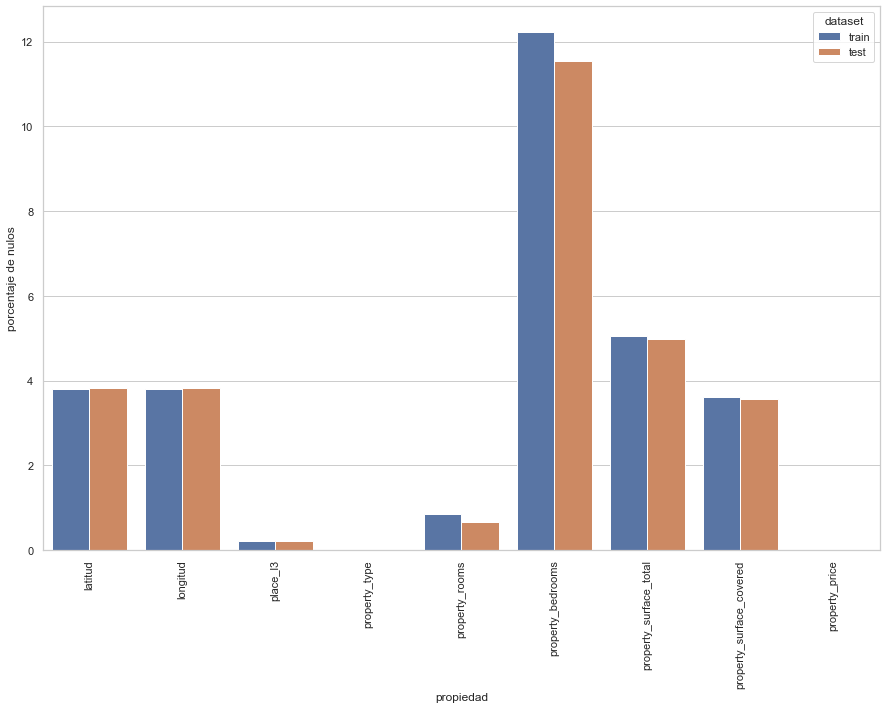

In [524]:
from matplotlib.pyplot import xlabel

plt.figure(figsize=(15, 10))

df_nulos_train['dataset'] = 'train'
df_nulos_test['dataset'] = 'test'

df_nulos = pd.concat([df_nulos_train, df_nulos_test])

sns.barplot(x='columna', y='faltantes', hue='dataset', data=df_nulos).set(xlabel='propiedad', ylabel='porcentaje de nulos')
plt.xticks(rotation=90)

plt.show()

Calculamos la cantidad de datos faltantes por cada fila de los datasets.

In [525]:
df_nulos_filas_train = ds_propiedades_train.isnull().sum(axis=1)
df_nulos_filas_train = df_nulos_filas_train.value_counts(normalize=True).to_frame(name="porcentaje de filas").reset_index()
df_nulos_filas_train.rename(columns={'index':"valores nulos por fila"}, inplace=True)
df_nulos_filas_train

,valores nulos por fila,porcentaje de filas
0,0,0.772786
1,1,0.172441
2,2,0.044297
3,3,0.008445
4,5,0.001120
5,4,0.000896
6,6,0.000014


In [526]:
df_nulos_filas_test = ds_propiedades_test.isnull().sum(axis=1)
df_nulos_filas_test = df_nulos_filas_test.value_counts(normalize=True).to_frame(name="porcentaje de filas").reset_index()
df_nulos_filas_test.rename(columns={'index':"valores nulos por fila"}, inplace=True)
df_nulos_filas_test

,valores nulos por fila,porcentaje de filas
0,0,0.777659
1,1,0.170504
2,2,0.042738
3,3,0.007020
4,4,0.001179
5,5,0.000899


Graficamos:

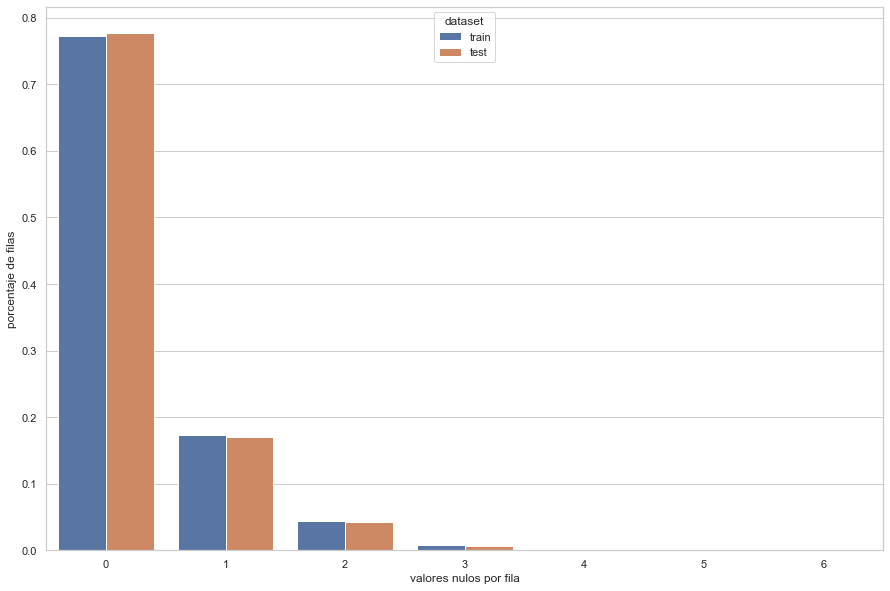

In [527]:
plt.figure(figsize=(15, 10))

df_nulos_filas_train['dataset'] = 'train'
df_nulos_filas_test['dataset'] = 'test'

df_nulos_filas = pd.concat([df_nulos_filas_train, df_nulos_filas_test])

sns.barplot(x='valores nulos por fila', y='porcentaje de filas', hue='dataset', data=df_nulos_filas)

plt.show()

<h3>Analisis de completado de datos faltantes</h3>

Para esta sección, tenemos que regirnos unicamente por el dataset de train y luego replicar las acciones en el dataset de test, pero no podemos/tenemos que tomar decisiones basandonos en el dataset de test porque eso puede interferir luego con el resultado de las pruebas.
<br><br>
<h4>Eliminación de datos</h4>


In [528]:
#checkpoint de los datasets sin las columnas eliminadas
ds_propiedades_test_sin_NANs = ds_propiedades_test.copy()
ds_propiedades_train_sin_NANs = ds_propiedades_train.copy()

<h4>Duplicados</h4>

Revisamos si hay datos duplicados en el dataset de train y test.

In [529]:
ds_propiedades_test = ds_propiedades_test_sin_NANs.copy()
ds_propiedades_train = ds_propiedades_train_sin_NANs.copy()

In [530]:
duplicados_train = ds_propiedades_train[ds_propiedades_train.duplicated()]
duplicados_test = ds_propiedades_test[ds_propiedades_test.duplicated()]

print(f"Cantidad de duplicadas en train: {duplicados_train.shape[0]}")
print(f"Cantidad de duplicadas en test: {duplicados_test.shape[0]}")


Cantidad de duplicadas en train: 8487
Cantidad de duplicadas en test: 805


Vemos que tenemos muchos datos duplicados en el dataset de train. Esto puede deberse a que los departamentos o PHs de un edificio/propiedad pueden estar en la misma ubicacion (latitud, longitud), ser de las mismas dimensiones y tener el mismo precio. En el caso de las casas, si podemos asumir que si todos los datos estan duplicados significa que son duplicados. Por esto es que procedemos a rehacer el analisis separando entre casas y departamentos/PHs.

Tampoco se puede utilizar el titulo para diferenciarlos porque es totalmente posible que existan publicaciones de departamentos/PHs de un mismo edificio/propiedad con el mismo titulo siendo todos publicados por la constructora (cuando son de pozo o a estrenar) o dueño de multiples unidades.

In [531]:
duplicados_train_casas = duplicados_train[duplicados_train.property_type == 'Casa']
duplicados_train_no_casas = duplicados_train[duplicados_train.property_type != 'Casa']

print(f"Cantidad de duplicadas en train (CASA): {duplicados_train_casas.shape[0]}")
print(f"Cantidad de duplicadas en train (DEPTO/PH): {duplicados_train_no_casas.shape[0]}")


Cantidad de duplicadas en train (CASA): 155
Cantidad de duplicadas en train (DEPTO/PH): 8332


Vemos que existen PHs y casas duplicados, por lo que procedemos a eliminarlos de ambos datasets. 

In [532]:
ds_propiedades_train.drop(duplicados_train_casas.index, inplace=True)

#lo mismo para test
duplicados_test_casas = duplicados_test[duplicados_test.property_type == 'Casa']
ds_propiedades_test.drop(duplicados_test_casas.index, inplace=True)


In [533]:
# checkpoint de los datasets sin duplicados
ds_propiedades_test_sin_duplicados = ds_propiedades_test.copy()
ds_propiedades_train_sin_duplicados = ds_propiedades_train.copy()

<h4>Completado de bedrooms y rooms con regresion lineal multiple</b4>

In [534]:
ds_propiedades_test = ds_propiedades_test_sin_duplicados.copy()
ds_propiedades_train = ds_propiedades_train_sin_duplicados.copy()

Para bedrooms vimos que existe una gran correlacion con las rooms y el precio, no solo por informacion del dataframe, sino tambien por el dominio del problema donde sabemos que en rooms estan incluidas las bedrooms y que la capacidad de personas es uno de los factores mas determinantes incluso por encima de la superficie (tambien se respalda con las correlaciones vistas anteriormente). Por esto decidimos hacer una regresion lineal entre estos tres para completar los datos faltantes.

In [535]:
from matplotlib.pyplot import plot
from sklearn.linear_model import LinearRegression

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Hacemos una regresion lineal para predecir los valores nulos de property_bedrooms y property_rooms
beedrooms_rooms_price_train = ds_propiedades_train[['property_bedrooms', 'property_rooms', 'property_price']].copy()
beedrooms_rooms_price_test = ds_propiedades_test[['property_bedrooms', 'property_rooms', 'property_price']].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=0)

imp = imp.fit(beedrooms_rooms_price_train)

Una vez tenemos el modelo entrenado con los datos de train, aplicamos el modelo para completar en ambos datasets con el mismo modelado para no alterar los resultados.

Tambien transformamos los valores obtenidos de la regresion linear en rooms y beedrooms a enteros por ser valores discretos.

In [536]:
beedrooms_rooms_price_train_completo = beedrooms_rooms_price_train.copy()
beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms', 'property_price']] = imp.transform(beedrooms_rooms_price_train)
beedrooms_rooms_price_train_completo['property_rooms'] = beedrooms_rooms_price_train_completo['property_rooms'].round(0)
beedrooms_rooms_price_train_completo['property_bedrooms'] = beedrooms_rooms_price_train_completo['property_bedrooms'].round(0)

beedrooms_rooms_price_test_completo = beedrooms_rooms_price_test.copy()
beedrooms_rooms_price_test_completo[['property_bedrooms', 'property_rooms', 'property_price']] = imp.transform(beedrooms_rooms_price_test)
beedrooms_rooms_price_test_completo['property_rooms'] = beedrooms_rooms_price_test_completo['property_rooms'].round(0)
beedrooms_rooms_price_test_completo['property_bedrooms'] = beedrooms_rooms_price_test_completo['property_bedrooms'].round(0)


Para demostrar que al imputar las filas con valores nulos, no se pierde ni altera información. Graficamos un scatterplot de la distribucion entre rooms y bedrooms previa y posterior a la imputación de los valores nulos, se ve que los que eran nulos antes, ahora se predicen.

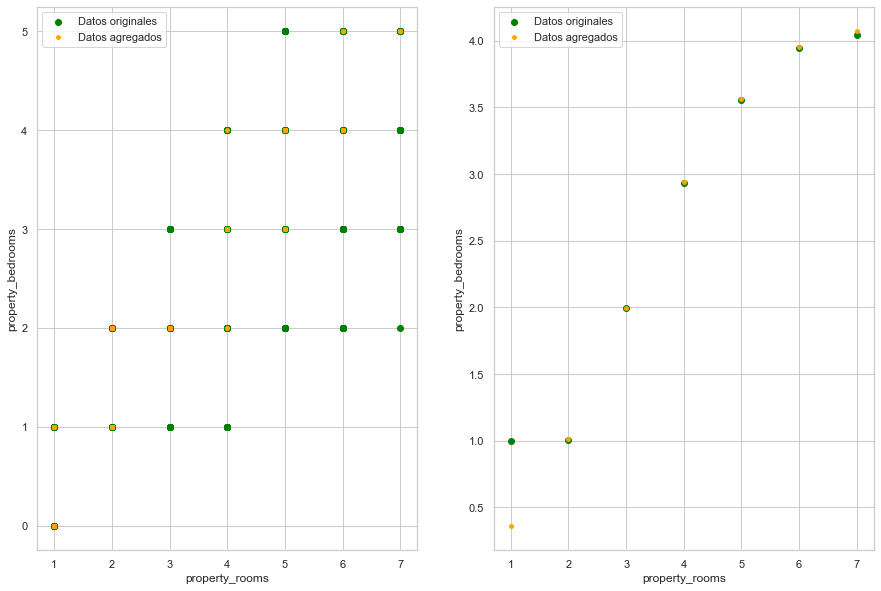

In [537]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].scatter(x=beedrooms_rooms_price_train_completo['property_rooms'], y=beedrooms_rooms_price_train_completo['property_bedrooms'], color='green')

filas_datos_faltantes = beedrooms_rooms_price_train[beedrooms_rooms_price_train.isnull().any(axis=1)]
datos_agregados = filas_datos_faltantes.merge(beedrooms_rooms_price_train_completo, how='inner', left_index=True, right_index=True)[['property_bedrooms_y', 'property_rooms_y']]

axs[0].scatter(x=datos_agregados['property_rooms_y'], y=datos_agregados['property_bedrooms_y'], color='orange', s=15)

relacion_bedrooms_rooms = beedrooms_rooms_price_train[['property_bedrooms', 'property_rooms']].copy()
relacion_bedrooms_rooms = relacion_bedrooms_rooms.groupby('property_rooms').mean().reset_index()
axs[1].scatter(x=relacion_bedrooms_rooms['property_rooms'], y=relacion_bedrooms_rooms['property_bedrooms'], color='green')

relacion_bedrooms_rooms_completo = beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms']].copy()
relacion_bedrooms_rooms_completo = relacion_bedrooms_rooms_completo.groupby('property_rooms').mean().reset_index()
axs[1].scatter(x=relacion_bedrooms_rooms_completo['property_rooms'], y=relacion_bedrooms_rooms_completo['property_bedrooms'], color='orange', s=15)
plt.setp(axs[0], xlabel='property_rooms', ylabel='property_bedrooms')
plt.setp(axs[1], xlabel='property_rooms', ylabel='property_bedrooms')


axs[0].legend(['Datos originales', 'Datos agregados'])
axs[1].legend(['Datos originales', 'Datos agregados'])


plt.show()

Habiendo visto que los valores completados son coherentes con los datos, procedemos a completar los datos faltantes de rooms con el mismo modelo.



In [538]:
a = (ds_propiedades_train['property_bedrooms'] / ds_propiedades_train['property_rooms']).mean()
print(f'dormitorios por cuarto antes: {a}')

ds_propiedades_train[['property_bedrooms', 'property_rooms']] = beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms']]
ds_propiedades_test[['property_bedrooms', 'property_rooms']] = beedrooms_rooms_price_test_completo[['property_bedrooms', 'property_rooms']]

a = (ds_propiedades_train['property_bedrooms'] / ds_propiedades_train['property_rooms']).mean()
print(f'dormitorios por cuarto despues: {a}')

dormitorios por cuarto antes: 0.6505503951231045
dormitorios por cuarto despues: 0.5808707757970204


In [539]:
# checkpoint de los datasets con los valores nulos de property_bedrooms y property_rooms completados
ds_propiedades_train_bedrooms_rooms_completos = ds_propiedades_train.copy()
ds_propiedades_test_bedrooms_rooms_completos = ds_propiedades_test.copy()

<h4>Completar Latitud y Logitud</h4>


In [540]:
ds_propiedades_train = ds_propiedades_train_bedrooms_rooms_completos.copy()
ds_propiedades_test = ds_propiedades_test_bedrooms_rooms_completos.copy()

In [541]:
filas_latitud_NaN = ds_propiedades[ds_propiedades['latitud'].isnull()].shape[0]
filas_longitud_NaN = ds_propiedades[ds_propiedades['longitud'].isnull()].shape[0]
filas_latitud_longitud_Nan = ds_propiedades[ds_propiedades['latitud'].isnull() & ds_propiedades['longitud'].isnull()].shape[0] #Estos los droppeamos, y para predecir longitud y latitud usamos las filas que si tengan place_l3
filas_latitud_longitud_barrio_Nan = ds_propiedades[ds_propiedades['latitud'].isnull() & ds_propiedades['longitud'].isnull() & ds_propiedades['place_l3'].isnull()].shape[0] #Estos los droppeamos, y para predecir longitud y latitud usamos las filas que si tengan place_l3

print(f"Cantidad de filas con latitud NaN: {filas_latitud_NaN}")
print(f'Cantidad de filas con longitud NaN: {filas_longitud_NaN},')
print(f'Cantidad de filas con Latitud y Longitud NaN: {filas_latitud_longitud_Nan}.')
print(f'Entonces las filas que que tienen Latitud como Nan y no a longitud son: {filas_latitud_NaN-filas_latitud_longitud_Nan}')
print(f'Cantidad de filas con Latitud, Longitud y barrio NaN: {filas_latitud_longitud_barrio_Nan}.')

Cantidad de filas con latitud NaN: 3730
Cantidad de filas con longitud NaN: 3730,
Cantidad de filas con Latitud y Longitud NaN: 3730.
Entonces las filas que que tienen Latitud como Nan y no a longitud son: 0
Cantidad de filas con Latitud, Longitud y barrio NaN: 170.


Para predecir la Latitud y Longitud de las viviendas faltantes, al ver que todas las filas en las que falta la Latitud, también falta la Longitud. Podemos usar el barrio (place_l3) de esta para tener una certeza de donde se puede encontrar. Así que calculamos la mediana de Latitud y Longitud para cada barrio (place_l3) y ponemos estas en su lugar. 

Primero droppeamos las filas que tienen como valores faltantes al barrio (place_l3) y a la latitud y longitud ya que la falta de ubicacion es un dato muy importante para el tipo de vivienda y sin estos tres datos es imposible determinarla con certeza.

In [542]:
ds_propiedades_train.drop(ds_propiedades_train[ds_propiedades_train['place_l3'].isnull() & 
                    ds_propiedades_train['latitud'].isnull() & ds_propiedades_train['longitud'].isnull()].index,
                    inplace=True)

ds_propiedades_test.drop(ds_propiedades_test[ds_propiedades_test['place_l3'].isnull() & 
                    ds_propiedades_test['latitud'].isnull() & ds_propiedades_test['longitud'].isnull()].index,
                    inplace=True)

Completamos los valores faltantes de longitud y latitud con las medianas del barrio (entrenado unicamente con train y usado para ambos datasets) en el que se ubiquen 

In [543]:
median_coord_place_l3 = ds_propiedades_train.groupby('place_l3')[['latitud', 'longitud']].median()


ds_propiedades_train['latitud'] = ds_propiedades_train.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['latitud'] if np.isnan(x['latitud']) else x['latitud'], axis=1)
ds_propiedades_train['longitud'] = ds_propiedades_train.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['longitud'] if np.isnan(x['longitud']) else x['longitud'], axis=1)

ds_propiedades_test['latitud'] = ds_propiedades_test.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['latitud'] if np.isnan(x['latitud']) else x['latitud'], axis=1)
ds_propiedades_test['longitud'] = ds_propiedades_test.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['longitud'] if np.isnan(x['longitud']) else x['longitud'], axis=1)

median_coord_place_l3.reset_index(inplace=True)

ds_propiedades_train[ds_propiedades_train['latitud'].isnull()]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price


Ahora completamos los valores restantes del barrio (place_l3) a partir de la latitud y longitud buscando el barrio con el centro mas cercano a la latitud y longitud de la vivienda.

In [544]:
def get_barrio(lat, lon):
    median_coord_place_l3['distancia'] = median_coord_place_l3.apply(lambda x: np.sqrt((x['latitud'] - lat)**2 + (x['longitud'] - lon)**2), axis=1)
    return median_coord_place_l3.sort_values(by=['distancia']).at[0, 'place_l3']

for i in ds_propiedades_train.index:
    if pd.isnull(ds_propiedades_train.at[i, 'place_l3']):
        lat = ds_propiedades_train.at[i, 'latitud']
        lon = ds_propiedades_train.at[i, 'longitud']
        barrio = get_barrio(lat, lon)
        ds_propiedades_train.at[i, 'place_l3'] = barrio


for i in ds_propiedades_test.index:
    if pd.isnull(ds_propiedades_test.at[i, 'place_l3']):
        lat = ds_propiedades_test.at[i, 'latitud']
        lon = ds_propiedades_test.at[i, 'longitud']
        barrio = get_barrio(lat, lon)
        ds_propiedades_test.at[i, 'place_l3'] = barrio

ds_propiedades_train[ds_propiedades_train['place_l3'].isnull()]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price


In [545]:
# checkpoint de los datasets con los valores nulos de latitud, longitud y place_l3 completados
ds_propiedades_train_latitud_longitud_place_l3_completos = ds_propiedades_train.copy()
ds_propiedades_test_latitud_longitud_place_l3_completos = ds_propiedades_test.copy()

<h4>Completar la superficie total y cubierta</h4>

Para completar estas, decidimos utilizar las medias de cada una

In [546]:
ds_propiedades_train = ds_propiedades_train_latitud_longitud_place_l3_completos.copy()
ds_propiedades_test = ds_propiedades_test_latitud_longitud_place_l3_completos.copy()

In [547]:
ds_propiedades_train['property_surface_total'].fillna(ds_propiedades_train['property_surface_total'].mean(), inplace=True)
ds_propiedades_test['property_surface_total'].fillna(ds_propiedades_test['property_surface_total'].mean(), inplace=True)

ds_propiedades_train['property_surface_covered'].fillna(ds_propiedades_train['property_surface_covered'].mean(), inplace=True)
ds_propiedades_test['property_surface_covered'].fillna(ds_propiedades_test['property_surface_covered'].mean(), inplace=True)

### <h2>Reducción de la dimensionalidad</h2>


Para esto, vamos a usar el algoritmo de PCA (Principal Component Analysis) para reducir la dimensionalidad de los datos cuantitativos.

In [548]:
from sklearn.preprocessing import StandardScaler

columnas_cuantitativas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']

ds_cuantitativas_train = ds_propiedades_train.loc[:, columnas_cuantitativas].values
ds_cuantitativas_test = ds_propiedades_test.loc[:, columnas_cuantitativas].values

escalador = StandardScaler().fit(ds_cuantitativas_train)

ds_cuantitativas_train = pd.DataFrame(escalador.transform(ds_cuantitativas_train), index=ds_propiedades_train.index)
ds_cuantitativas_test = pd.DataFrame(escalador.transform(ds_cuantitativas_test), index=ds_propiedades_test.index)

In [549]:
from sklearn.decomposition import PCA

pca_completo = PCA()
pca_completo = pca_completo.fit(ds_cuantitativas_train)

In [550]:
varianza_acumulada = np.cumsum(pca_completo.explained_variance_ratio_) * 100

In [551]:
componentes_necesarios = np.argmax(varianza_acumulada > 85) + 1
print("Las columnas necesarias para mantener el 95% de la varianza es: " + str(componentes_necesarios))

Las columnas necesarias para mantener el 95% de la varianza es: 3


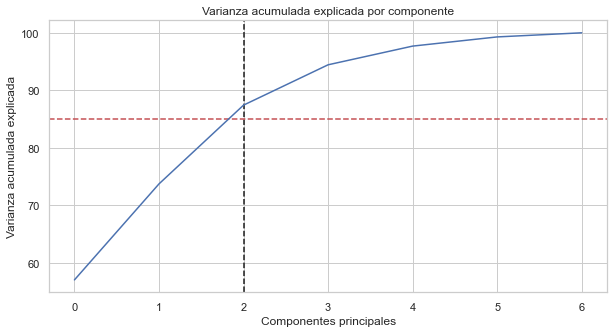

In [552]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=componentes_necesarios-1, color="k", linestyle="--")
plt.axhline(y=85, color="r", linestyle="--")
ax = plt.plot(varianza_acumulada)
plt.show()

In [553]:
pca = PCA(n_components=componentes_necesarios, random_state=123)

pca = pca.fit(ds_cuantitativas_train)

cp_columns = ['cp_1', 'cp_2','cp_3']

ds_cuantitativas_train = pd.DataFrame(pca.transform(ds_cuantitativas_train), columns = cp_columns, index=ds_propiedades_train.index)
ds_cuantitativas_test = pd.DataFrame(pca.transform(ds_cuantitativas_test), columns = cp_columns, index=ds_propiedades_test.index)

In [554]:
ds_propiedades_train_reducida = ds_propiedades_train[['place_l3', 'property_type']].copy()
ds_propiedades_train_reducida[cp_columns] = ds_cuantitativas_train[cp_columns]

ds_propiedades_test_reducida = ds_propiedades_test[['place_l3', 'property_type']].copy()
ds_propiedades_test_reducida[cp_columns] = ds_cuantitativas_test[cp_columns]

ds_propiedades_reducida = pd.concat([ds_propiedades_train_reducida, ds_propiedades_test_reducida], axis=0)

ds_propiedades_reducida

,place_l3,property_type,cp_1,cp_2,cp_3
60535,Nuñez,Departamento,3.698074,-1.404788,0.735214
74300,Colegiales,Departamento,-1.181282,-0.540308,0.288456
20578,Almagro,Departamento,-0.547079,0.698350,-0.184683
38282,Villa Lugano,PH,0.121949,2.137885,-2.762271
35433,Villa Devoto,PH,-1.707013,-0.605262,-1.568764
...,...,...,...,...,...
28310,Puerto Madero,Departamento,5.786847,1.085057,3.173285
54642,Almagro,Departamento,-2.625688,0.468766,0.499204
51333,Floresta,Departamento,-2.630895,0.577181,-1.278344
86137,Palermo,Departamento,-1.979478,-0.075301,0.295629


In [555]:
ds_propiedades_reducida.to_csv('ds_propiedades_reducida.csv', index=False)

## <center> <h2>Agrupamiento</h2> <center/> 

## <center> <h2>Clasificación</h2> <center/> 

### Construcción del target

In [556]:
ds_propiedades_train_clasificado = ds_propiedades_train.copy()
ds_propiedades_test_clasificado = ds_propiedades_test.copy()

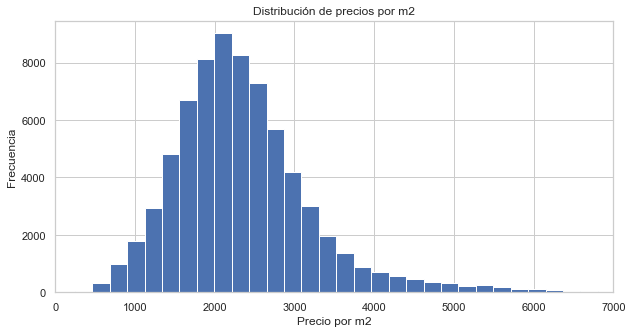

In [557]:

ds_propiedades_train_clasificado['pxm2'] = ds_propiedades_train_clasificado['property_price'] / ds_propiedades_train_clasificado['property_surface_total']
ds_propiedades_test_clasificado['pxm2'] = ds_propiedades_test_clasificado['property_price'] / ds_propiedades_test_clasificado['property_surface_total']
# show pxm2 distribution
plt.figure(figsize=(10, 5))
plt.title('Distribución de precios por m2')
plt.xlabel('Precio por m2')
plt.xlim(0,7000)
plt.ylabel('Frecuencia')
plt.hist(ds_propiedades_train_clasificado['pxm2'], bins=100)
plt.show()


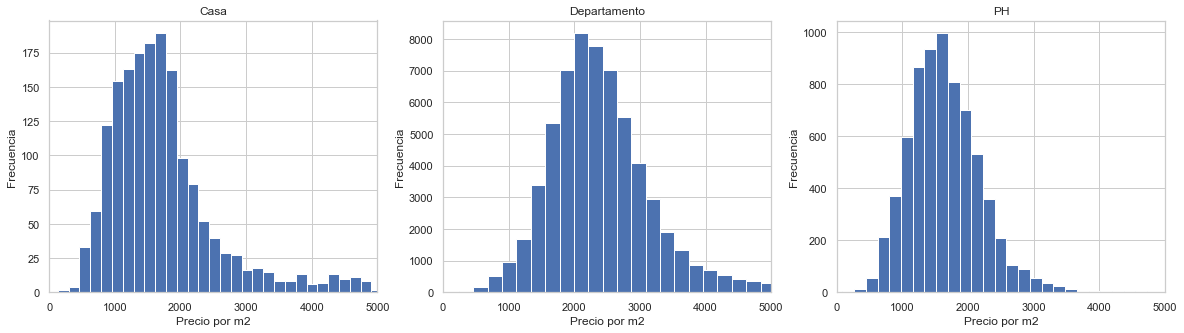

In [558]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.title('Distribución de precios por m2')

axs[0].set_title('Casa')
axs[0].set_xlim(0,5000)
axs[0].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Casa', 'pxm2'], bins=50)
axs[0].set_xlabel('Precio por m2')
axs[0].set_ylabel('Frecuencia')

axs[1].set_title('Departamento')
axs[1].set_xlim(0,5000)
axs[1].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Departamento', 'pxm2'], bins=100)
axs[1].set_xlabel('Precio por m2')
axs[1].set_ylabel('Frecuencia')



axs[2].set_title('PH')
axs[2].set_xlim(0,5000)
axs[2].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'PH', 'pxm2'], bins=50)
axs[2].set_xlabel('Precio por m2')
axs[2].set_ylabel('Frecuencia')


plt.show()

Dividimos el dataset con las distintas alternativas propuestas

In [559]:
# Alternativa 1: dividimos en 33, 33, 33
ds_propiedades_train_clasificado['pxm2_quantiles_33_33_33'] = pd.qcut(ds_propiedades_train_clasificado['pxm2'], q=3, labels=False)
ds_propiedades_test_clasificado['pxm2_quantiles_33_33_33'] = pd.qcut(ds_propiedades_test_clasificado['pxm2'], q=3, labels=False)

# Alternativa 2: dividimos en 25, 50, 25
ds_propiedades_train_clasificado['pxm2_quantiles_25_50_25'] = pd.qcut(ds_propiedades_train_clasificado['pxm2'], q=4, labels=False)
ds_propiedades_test_clasificado['pxm2_quantiles_25_50_25'] = pd.qcut(ds_propiedades_test_clasificado['pxm2'], q=4, labels=False)
# Juntamos los quantiles del medio para tener la distribucion 25, 50, 25
ds_propiedades_train_clasificado['pxm2_quantiles_25_50_25'] = ds_propiedades_train_clasificado['pxm2_quantiles_25_50_25'].replace(2, 1)
ds_propiedades_test_clasificado['pxm2_quantiles_25_50_25'] = ds_propiedades_test_clasificado['pxm2_quantiles_25_50_25'].replace(2, 1)


# Alternativa 3: filtramos por tipo de propiedad y luego dividimos en 25, 50, 25
deptos = ds_propiedades_train_clasificado[ds_propiedades_train_clasificado['property_type'] == 'Departamento']
casas = ds_propiedades_train_clasificado[ds_propiedades_train_clasificado['property_type'] == 'Casa']
phs = ds_propiedades_train_clasificado[ds_propiedades_train_clasificado['property_type'] == 'PH']


deptos['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(deptos['pxm2'], q=4, labels=False)
deptos['pxm2_quantiles_25_50_25_relativo'] = deptos['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

casas['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(casas['pxm2'], q=4, labels=False)
casas['pxm2_quantiles_25_50_25_relativo'] = casas['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

phs['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(phs['pxm2'], q=4, labels=False)
phs['pxm2_quantiles_25_50_25_relativo'] = phs['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

ds_propiedades_train_clasificado = pd.concat([deptos, casas, phs])

#Lo mismo para test
deptos = ds_propiedades_test_clasificado[ds_propiedades_test_clasificado['property_type'] == 'Departamento']
casas = ds_propiedades_test_clasificado[ds_propiedades_test_clasificado['property_type'] == 'Casa']
phs = ds_propiedades_test_clasificado[ds_propiedades_test_clasificado['property_type'] == 'PH']

deptos['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(deptos['pxm2'], q=4, labels=False)
deptos['pxm2_quantiles_25_50_25_relativo'] = deptos['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

casas['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(casas['pxm2'], q=4, labels=False)
casas['pxm2_quantiles_25_50_25_relativo'] = casas['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

phs['pxm2_quantiles_25_50_25_relativo'] = pd.qcut(phs['pxm2'], q=4, labels=False)
phs['pxm2_quantiles_25_50_25_relativo'] = phs['pxm2_quantiles_25_50_25_relativo'].replace(2, 1)

ds_propiedades_test_clasificado = pd.concat([deptos, casas, phs])

Creamos tipo_precio con las distintas distribuciones

In [560]:
ds_propiedades_train_clasificado['tipo_precio_33_33_33'] = ds_propiedades_train_clasificado['pxm2_quantiles_33_33_33'].replace(0, 'bajo').replace(1, 'medio').replace(2, 'alto')
ds_propiedades_test_clasificado['tipo_precio_33_33_33'] = ds_propiedades_test_clasificado['pxm2_quantiles_33_33_33'].replace(0, 'bajo').replace(1, 'medio').replace(2, 'alto')

ds_propiedades_train_clasificado['tipo_precio_25_50_25'] = ds_propiedades_train_clasificado['pxm2_quantiles_25_50_25'].replace(0, 'bajo').replace(1, 'medio').replace(3, 'alto')
ds_propiedades_test_clasificado['tipo_precio_25_50_25'] = ds_propiedades_test_clasificado['pxm2_quantiles_25_50_25'].replace(0, 'bajo').replace(1, 'medio').replace(3, 'alto')

ds_propiedades_train_clasificado['tipo_precio_25_50_25_relativo'] = ds_propiedades_train_clasificado['pxm2_quantiles_25_50_25_relativo'].replace(0, 'bajo').replace(1, 'medio').replace(3, 'alto')
ds_propiedades_test_clasificado['tipo_precio_25_50_25_relativo'] = ds_propiedades_test_clasificado['pxm2_quantiles_25_50_25_relativo'].replace(0, 'bajo').replace(1, 'medio').replace(3, 'alto')

Distribuciones con los datos distribuidos en 33%

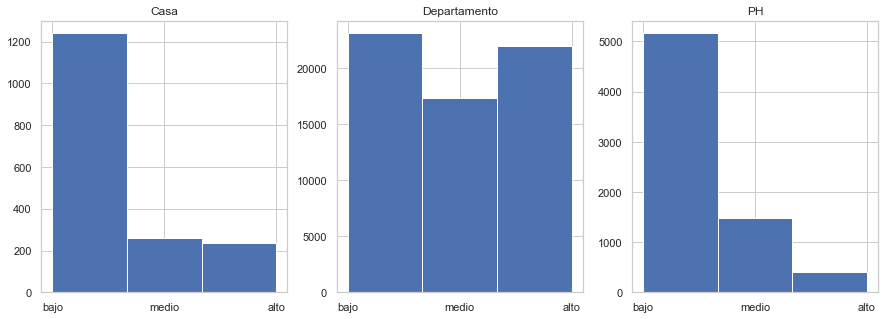

In [561]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.title('Distribución por quantiles de precios por m2')

axs[0].set_title('Casa')
axs[0].set_xticklabels(['bajo', 'medio', 'alto'])
axs[0].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Casa', 'tipo_precio_33_33_33'], bins=3)


axs[1].set_title('Departamento')
axs[1].set_xticklabels(['bajo', 'medio', 'alto'])
axs[1].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Departamento', 'tipo_precio_33_33_33'], bins=3)

axs[2].set_title('PH')
axs[2].set_xticklabels(['bajo', 'medio', 'alto'])
axs[2].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'PH', 'tipo_precio_33_33_33'], bins=3)

plt.show()

Distribuciones con los datos distribuidos en 25, 50 y 25


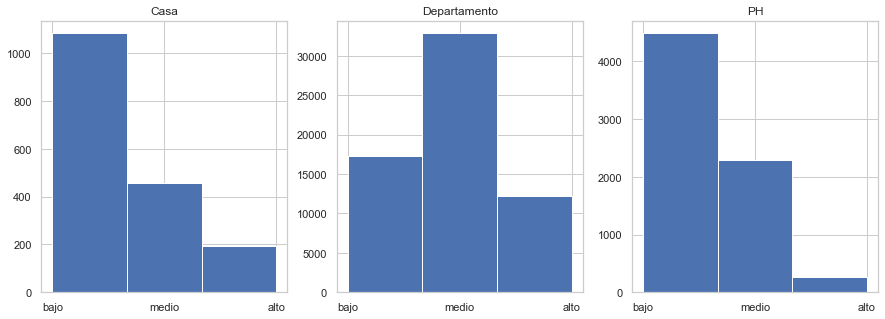

In [562]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.title('Distribución por quantiles de precios por m2')

axs[0].set_title('Casa')
axs[0].set_xticklabels(['bajo', 'medio', 'alto'])
axs[0].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Casa', 'tipo_precio_25_50_25'], bins=3)

axs[1].set_title('Departamento')
axs[1].set_xticklabels(['bajo', 'medio', 'alto'])
axs[1].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Departamento', 'tipo_precio_25_50_25'], bins=3)

axs[2].set_title('PH')
axs[2].set_xticklabels(['bajo', 'medio', 'alto'])
axs[2].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'PH', 'tipo_precio_25_50_25'], bins=3)

plt.show()

Distribuciones con los datos distribuidos en 25, 50 y 25 segun tipo de propiedad

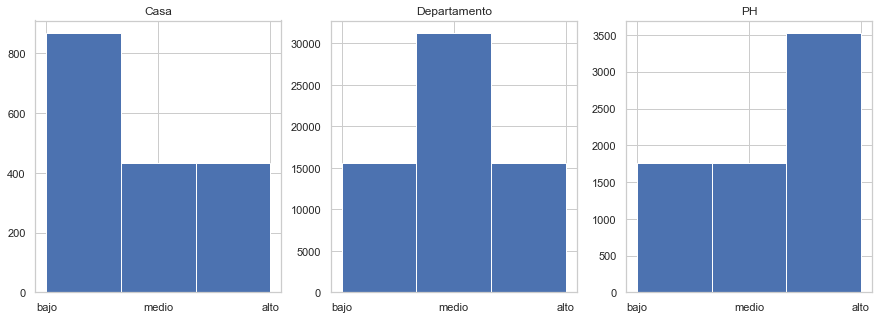

In [563]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.title('Distribución por quantiles de precios por m2')

axs[0].set_title('Casa')
axs[0].set_xticklabels(['bajo', 'medio', 'alto'])
axs[0].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Casa', 'tipo_precio_25_50_25_relativo'], bins=3)

axs[1].set_title('Departamento')
axs[1].set_xticklabels(['bajo', 'medio', 'alto'])
axs[1].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'Departamento', 'tipo_precio_25_50_25_relativo'], bins=3)

axs[2].set_title('PH')
axs[2].set_xticklabels(['bajo', 'medio', 'alto'])
axs[2].hist(ds_propiedades_train_clasificado.loc[ds_propiedades_train_clasificado['property_type'] == 'PH', 'tipo_precio_25_50_25_relativo'], bins=3)

plt.show()

Seleccionamos la alternativa tal porque tuki tuki (justificar)

Comparar con la parte 2

Una vez elegida la alternativa, modificar aca abajo para usar esa (o dejar como esta si elegimos 25,50,25)

In [564]:
ds_propiedades_train_clasificado['tipo_precio'] = ds_propiedades_train_clasificado['tipo_precio_25_50_25']
ds_propiedades_test_clasificado['tipo_precio'] = ds_propiedades_test_clasificado['tipo_precio_25_50_25']

ds_propiedades_train_clasificado.drop(['pxm2_quantiles_33_33_33', 'pxm2_quantiles_25_50_25', 'tipo_precio_33_33_33', 'tipo_precio_25_50_25', 'pxm2_quantiles_25_50_25_relativo', 'tipo_precio_25_50_25_relativo'], axis=1, inplace=True)
ds_propiedades_test_clasificado.drop(['pxm2_quantiles_33_33_33', 'pxm2_quantiles_25_50_25', 'tipo_precio_33_33_33', 'tipo_precio_25_50_25', 'pxm2_quantiles_25_50_25_relativo', 'tipo_precio_25_50_25_relativo'], axis=1, inplace=True)

Mostrar en un mapa de CABA los avisos coloreados por tipo_precio (HACER)

In [565]:
# gdf = gpd.GeoDataFrame(
#     ds_propiedades_train_clasificado, geometry=gpd.points_from_xy(ds_propiedades_train_clasificado.longitud, ds_propiedades_train_clasificado.latitud))

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # We restrict to South America.
# ax = world[world.continent == 'South America'].plot(
#     color='white', edgecolor='black')

# # We can now plot our ``GeoDataFrame``.
# gdf.plot(ax=ax, color='red')


# plt.show()

In [566]:
#Dejar esta celda al final
# ds_propiedades_train_clasificado.drop(['geometry'], axis=1, inplace=True)

### Entrenamiento y Predicción -> Agregar tambien el df del punto 1d

In [567]:
ds_propiedades_train_reducido = ds_propiedades_train_clasificado.copy()
ds_propiedades_test_reducido = ds_propiedades_test_clasificado.copy()

ds_propiedades_train_reducida_1d = ds_propiedades_train_reducida.copy() #del punto 1d, habria que cambiar nombres 

Sacamos todas las variables que tengan informacion sobre el precio

In [568]:
ds_propiedades_train_reducido.drop(['property_price', 'pxm2'], axis=1, inplace=True)
ds_propiedades_test_reducido.drop(['property_price', 'pxm2'], axis=1, inplace=True)


ds_propiedades_train_reducido

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,tipo_precio
60535,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,alto
74300,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,alto
20578,-34.605829,-58.422202,Almagro,Departamento,3.0,2.0,47.0,47.0,medio
15376,-34.562153,-58.455100,Belgrano,Departamento,2.0,1.0,52.0,48.0,medio
22942,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,bajo
...,...,...,...,...,...,...,...,...,...
1046,-34.591411,-58.492074,Agronomía,PH,3.0,2.0,136.0,102.0,bajo
93248,-34.564713,-58.483407,Villa Urquiza,PH,2.0,1.0,37.0,35.0,medio
35437,-34.613199,-58.506849,Villa Devoto,PH,3.0,2.0,142.0,84.0,bajo
88462,-34.647805,-58.490221,Parque Avellaneda,PH,6.0,3.0,108.0,81.0,bajo


Transformamos el dataframe para poder usar el algoritmo

In [569]:
#One hot encoding para variables categoricas
ds_propiedades_train_reducido = pd.get_dummies(ds_propiedades_train_reducido, columns=["place_l3", "property_type"])
ds_propiedades_test_reducido = pd.get_dummies(ds_propiedades_test_reducido, columns=["place_l3", "property_type"])
ds_propiedades_train_reducido


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,tipo_precio,place_l3_Abasto,place_l3_Agronomía,place_l3_Almagro,...,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
60535,-34.558855,-58.452458,4.0,3.0,160.0,146.0,alto,0,0,0,...,0,0,0,0,0,0,0,0,1,0
74300,-34.582403,-58.443841,2.0,1.0,50.0,46.0,alto,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20578,-34.605829,-58.422202,3.0,2.0,47.0,47.0,medio,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15376,-34.562153,-58.455100,2.0,1.0,52.0,48.0,medio,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22942,-34.606738,-58.389426,3.0,2.0,76.0,75.0,bajo,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,-34.591411,-58.492074,3.0,2.0,136.0,102.0,bajo,0,1,0,...,0,0,0,0,0,0,0,0,0,1
93248,-34.564713,-58.483407,2.0,1.0,37.0,35.0,medio,0,0,0,...,0,0,0,0,0,1,0,0,0,1
35437,-34.613199,-58.506849,3.0,2.0,142.0,84.0,bajo,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88462,-34.647805,-58.490221,6.0,3.0,108.0,81.0,bajo,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Ajustamos el dataframe para tener los train y test necesarios

In [570]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#Creo un dataset con los features que voy a usar para clasificar
ds_propiedades_train_x = ds_propiedades_train_reducido.drop(['tipo_precio'], axis='columns', inplace=False)
ds_propiedades_test_x = ds_propiedades_test_reducido.drop(['tipo_precio'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_reducido['tipo_precio'].copy()
ds_propiedades_test_y = ds_propiedades_test_reducido['tipo_precio'].copy()


Hacemos lo mismo con el dataset del punto 1d

In [571]:
ds_propiedades_train_reducida_1d = pd.get_dummies(ds_propiedades_train_reducida_1d, columns=["place_l3", "property_type"])
ds_propiedades_train_reducida_1d = pd.get_dummies(ds_propiedades_train_reducida_1d, columns=["place_l3", "property_type"])

ds_propiedades_train_x_1d = ds_propiedades_train_reducida_1d
ds_propiedades_test_x_1d = ds_propiedades_train_reducida_1d

ds_propiedades_train_y_1d = ds_propiedades_train_reducido['tipo_precio'].copy()
ds_propiedades_test_y_1d = ds_propiedades_test_reducido['tipo_precio'].copy()



KeyError: "None of [Index(['place_l3', 'property_type'], dtype='object')] are in the [columns]"

### Árbol de decisión

#### Primero hacemos la prediccion sin ajustar hiperparametros

In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

#Entreno el modelo
model = tree_model.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y)

#Realizamos una predicción sobre el set de test
y_pred = model.predict(ds_propiedades_test_x)
#Valores Predichos
y_pred

array(['medio', 'alto', 'bajo', ..., 'medio', 'bajo', 'medio'],
      dtype=object)

Text(30.5, 0.5, 'True')

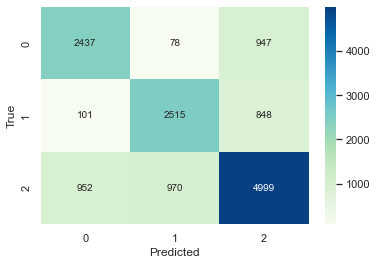

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(ds_propiedades_test_y, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_train_pred = model.predict(ds_propiedades_train_x)

accuracy_train=accuracy_score(ds_propiedades_train_y,y_train_pred)
recall_train=recall_score(ds_propiedades_train_y,y_train_pred, average='micro')
f1_train=f1_score(ds_propiedades_train_y,y_train_pred, average='micro')

print("Accuracy: "+str(round(accuracy_train, 3)*100)+"%")
print("Recall: "+str(round(recall_train, 3)*100)+"%")
print("f1 score: "+str(round(f1_train, 3)*100)+"%")

Accuracy: 98.0%
Recall: 98.0%
f1 score: 98.0%


In [ ]:
from numpy import average

accuracy=accuracy_score(ds_propiedades_test_y,y_pred)
recall=recall_score(ds_propiedades_test_y,y_pred, average='micro')
f1=f1_score(ds_propiedades_test_y,y_pred, average='micro')

print("Accuracy: "+str(round(accuracy, 3)*100)+"%")
print("Recall: "+str(round(recall, 3)*100)+"%")
print("f1 score: "+str(round(f1, 3)*100)+"%")


Accuracy: 71.89999999999999%
Recall: 71.89999999999999%
f1 score: 71.89999999999999%


#### Ahora con hiperparametros


Debido a que los hiperparámetros viven en un espacio tan grande, decidimos hacer RandomSearch, ya que como GridSearch prueba todas las combinaciones posibles, esto tardaría una cantidad de tiempo muy alta. <br>
También decidimos tomar 5 folds ya que es una cantidad común, ni muy alta ni muy baja, lo que hace que no tarde una excesiva cantidad de tiempo el algoritmo y que pueda splittearse bien en cada iteración

KFOLD CV

In [ ]:

from numpy import ravel_multi_index
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk

n=50

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,10))}

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds, random_state=13,shuffle=True)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=13) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(ds_propiedades_train_x,ds_propiedades_train_y);

Ahora vemos cuales fueron los mejores parámetros y su score

In [ ]:
print(randomcv.best_params_)

{'max_depth': 8, 'criterion': 'entropy', 'ccp_alpha': 0.0030612244897959186}


In [ ]:

parametros = randomcv.best_params_

tree_model = tree.DecisionTreeClassifier(max_depth = parametros['max_depth'], criterion=parametros['criterion'], ccp_alpha=parametros['ccp_alpha'])

model = tree_model.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y) 

y_pred = model.predict(ds_propiedades_test_x)

Text(30.5, 0.5, 'True')

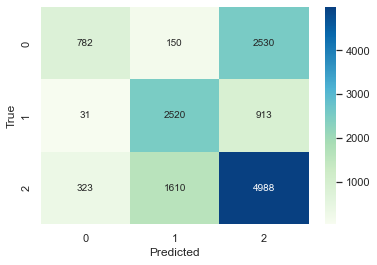

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(ds_propiedades_test_y, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(ds_propiedades_test_y,y_pred)
recall=recall_score(ds_propiedades_test_y,y_pred, average='micro')
f1=f1_score(ds_propiedades_test_y,y_pred, average='micro')

print("Accuracy: "+str(round(accuracy, 3)*100)+"%")
print("Recall: "+str(round(recall, 3)*100)+"%")
print("f1 score: "+str(round(f1, 3)*100)+"%")

Accuracy: 59.9%
Recall: 59.9%
f1 score: 59.9%


##### Entonces podemos ver que los mejores hiperparámetros encontrados con RandomSearch terminaron empeorando nuestro árbol de decisión. Esto fue debido a que los hiperparámetros en este caso viven en un espacio muy grande y nos perjudica a la hora de buscarlos, ya que es muy difícil encontrar una buena combinación, y utilizar GridSearch demoraría muchísimo tiempo. Gracias a esto llegamos a la conclusión de que conviene usar el árbol sin los hiperparámetros encontrados. <br>
#### Graficamos una parte de este ya que es muy extenso:

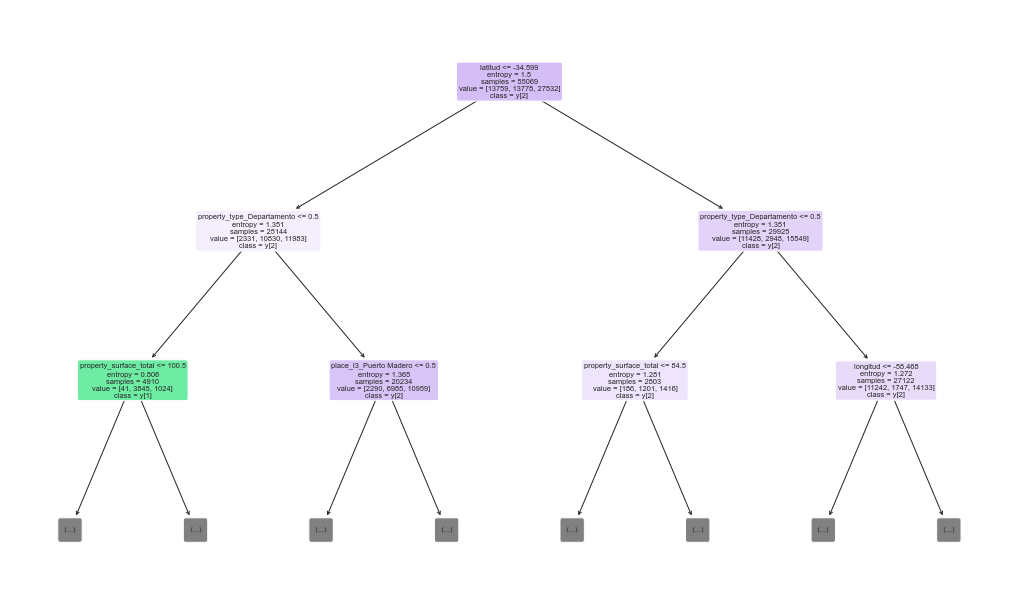

In [ ]:
plt.figure(figsize=(18,11))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_propiedades_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

#### Como podemos ver este árbol separa primero por Latitud, después va viendo por el tipo de propiedad (Departamento), también por la superficie y por el barrio. <br>
Esto tiene mucho sentido ya que el precio de una propiedad está fuertemente ligado al lugar donde se encuentra esta y al tipo de vivienda que es, por ejemplo un Departamento en Palermo suele salir lo mismo que una casa en Flores (aunque la casa sea más grande).<br> 
También que separe por la superficie total está muy bien debido a que suele pasar que las viviendas con mayor superficie valen más. Aunque esto no pase siempre, porque el barrio tiene mucho que ver con el precio por metro cuadrado.

In [ ]:
tree_model = tree.DecisionTreeClassifier()

#Entreno el modelo
model = tree_model.fit(X = ds_propiedades_train_x_1d, y = ds_propiedades_train_y_1d)

#Realizamos una predicción sobre el set de test
y_pred = model.predict(ds_propiedades_test_x_1d)
#Valores Predichos
y_pred

ValueError: could not convert string to float: 'Nuñez'

Text(47.25, 0.5, 'True')

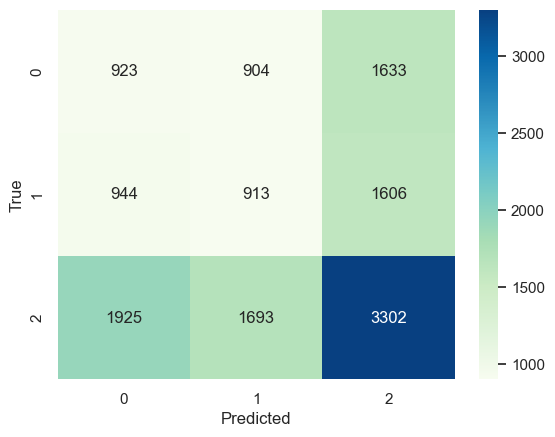

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(ds_propiedades_test_y_1d, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(ds_propiedades_test_y_1d,y_pred)
recall=recall_score(ds_propiedades_test_y_1d,y_pred, average='micro')
f1=f1_score(ds_propiedades_test_y_1d,y_pred, average='micro')

print("Accuracy: "+str(round(accuracy, 3)*100)+"%")
print("Recall: "+str(round(recall, 3)*100)+"%")
print("f1 score: "+str(round(f1, 3)*100)+"%")

Accuracy: 37.1%
Recall: 37.1%
f1 score: 37.1%


Ahora buscamos hiperparametros

In [ ]:
n=50

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,10))}

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds, random_state=13,shuffle=True)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=13) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(ds_propiedades_train_x_1d,ds_propiedades_train_y_1d);

In [ ]:
parametros = randomcv.best_params_

tree_model = tree.DecisionTreeClassifier(max_depth = parametros['max_depth'], criterion=parametros['criterion'], ccp_alpha=parametros['ccp_alpha'])

model = tree_model.fit(X = ds_propiedades_train_x_1d, y = ds_propiedades_train_y_1d) 

y_pred = model.predict(ds_propiedades_test_x_1d)

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(ds_propiedades_test_y_1d, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

ValueError: Found input variables with inconsistent numbers of samples: [13846, 55050]

### Random Forest

#### De vuelta probamos primero sin hiperparámetros

In [ ]:
import dtreeviz.trees as dtv
from sklearn.ensemble import RandomForestClassifier

#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(random_state=3)
                             
#Entrenamos el modelo
modelo = rfc.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y)

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = modelo.predict(ds_propiedades_test_x)

#Valores Predichos
y_pred

array(['medio', 'alto', 'bajo', ..., 'bajo', 'bajo', 'bajo'], dtype=object)

Calculemos las matriz de confusión y sus métricas para ver que tan acertado es nuestro modelo

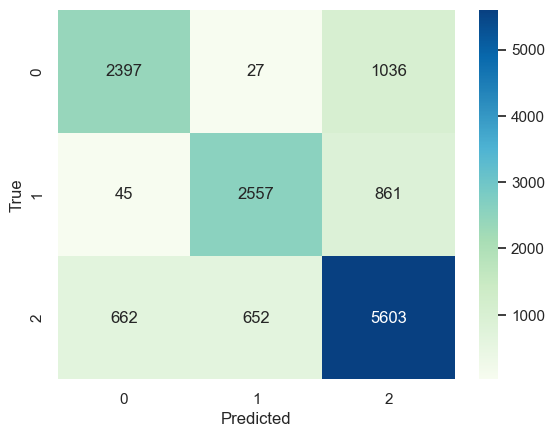

In [ ]:
#Create confusion matrix
tabla=confusion_matrix(ds_propiedades_test_y, y_pred)

#Plot confusion matrix
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
y_train_pred = modelo.predict(ds_propiedades_train_x)

accuracy_train=accuracy_score(ds_propiedades_train_y,y_train_pred)
recall_train=recall_score(ds_propiedades_train_y,y_train_pred, average='micro')
f1_train=f1_score(ds_propiedades_train_y,y_train_pred, average='micro')

print("Accuracy: "+str(round(accuracy_train, 2)*100)+"%")
print("Recall: "+str(round(recall_train, 2)*100)+"%")
print("f1 score: "+str(round(f1_train, 2)*100)+"%")

Accuracy: 98.0%
Recall: 98.0%
f1 score: 98.0%


In [ ]:
accuracy_test=accuracy_score(ds_propiedades_test_y,y_pred)
recall_test=recall_score(ds_propiedades_test_y,y_pred, average='micro')
f1_test=f1_score(ds_propiedades_test_y,y_pred, average='micro')

print("Accuracy: "+str(round(accuracy_test, 3)*100)+"%")
print("Recall: "+str(round(recall_test, 3)*100)+"%")
print("f1 score: "+str(round(f1_test, 3)*100)+"%")

Accuracy: 76.3%
Recall: 76.3%
f1 score: 76.3%


##### Ahora buscamos si con hiperparámetros podemos mejorar este modelo. <br>
Igualmente al haber visto anteriormente que estos viven en un espacio muy grande, no tenemos ninguna certeza de poder encontrar una mejora

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=8, n_jobs=-1)

n=10

params_grid = { "criterion" : ["gini", "entropy"], 
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5, 10],
}

folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')


random_search_cv = RandomizedSearchCV(estimator=rf_cv,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=10) 

random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
print(random_fit.best_params_)

{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 7, 'criterion': 'gini'}


In [ ]:
parametros = random_fit.best_params_

rf_model = RandomForestClassifier(max_depth = parametros['max_depth'], criterion=parametros['criterion'], n_estimators=parametros['n_estimators'], min_samples_split=parametros['min_samples_split'])

model = rf_model.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y) 

y_pred = model.predict(ds_propiedades_test_x)

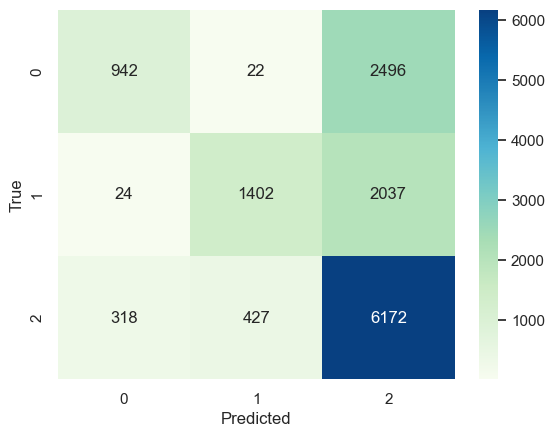

In [ ]:
#confusion matrix
tabla=confusion_matrix(ds_propiedades_test_y, y_pred)

#Plot confusion matrix
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:

accuracy=accuracy_score(ds_propiedades_test_y,y_pred)
recall=recall_score(ds_propiedades_test_y,y_pred, average='micro')
f1=f1_score(ds_propiedades_test_y,y_pred, average='micro')

print("Accuracy: "+str(round(accuracy, 3)*100)+"%")
print("Recall: "+str(round(recall, 3)*100)+"%")
print("f1 score: "+str(round(f1, 3)*100)+"%")

Accuracy: 61.5%
Recall: 61.5%
f1 score: 61.5%


#### Podemos ver, de vuelta, que el Random Forest tampoco mejora al intentar buscar sus hiperparámetros. Esto es debido a la misma razón que antes.

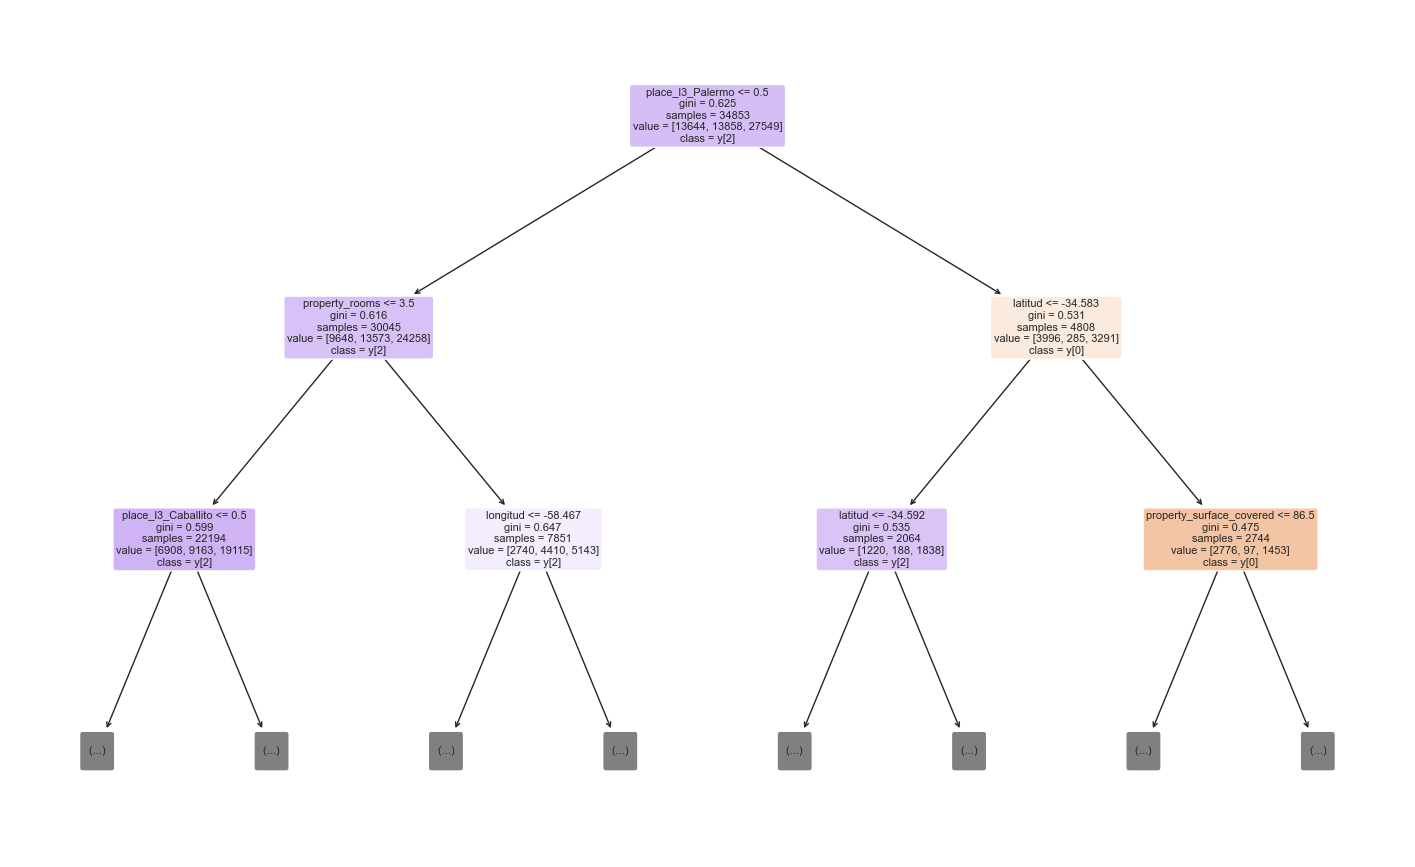

In [ ]:
plt.figure(figsize=(18,11))

tree_plot=tree.plot_tree(modelo.estimators_[11],
                            max_depth=2,
                            feature_names=ds_propiedades_train_x.columns.to_list(),
                            filled=True,
                            rounded=True,
                            class_names=True)

plt.show(tree_plot)

Podemos ver que el árbol separa por si la observacion está en el barrio de Palermo, si esto no se cumple tiene en cuenta la cantidad de habitaciones que tiene, si este se encuentra en Caballito o la cantidad de dormitorios que tiene. En cambio si se encuentra en Palermo, va separando por la cantidad de superficie total de este y después de su cantidad de dormitorios.<br>
Estos atributos que va eligiendo tienen mucho sentido, ya que el barrio de Palermo es donde más observaciones hay y el precio por metro cuadrado es más caro ya que hay muchos departamentos chicos que son caros. También tiene mucho sentido que separe por la superficie y por la cantidad de habitaciones/dormitorios ya que estos deciden fuertemente el precio que tiene cada propiedad (Después de haber separado por barrio)

### Modelo a elección: AdaBoost

#### Utilizando parametros arbitrarios primero

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Estos son los parametros predeterminados de AdaBoost si no le paso ninguno
AdaBoostClassifier().get_params()

In [ ]:
#uso hiperparametros arbitrarios para crear el clasificador
ab_model = AdaBoostClassifier(learning_rate=0.1, n_estimators=30, random_state=0, algorithm='SAMME.R')

model_ab = ab_model.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y)

In [ ]:
#Prediccion sobre el dataset de test
y_pred_test_ab = model_ab.predict(ds_propiedades_test_x)

In [ ]:
cm = confusion_matrix(ds_propiedades_test_y, y_pred_test_ab)


sns.heatmap(cm,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix - Test')
plt.show()

#### Performance Test

In [ ]:
#performance test
accuracy_test=accuracy_score(ds_propiedades_test_y,y_pred_test_ab)
recall_test=recall_score(ds_propiedades_test_y,y_pred_test_ab, average='micro')
f1_test=f1_score(ds_propiedades_test_y,y_pred_test_ab, average='micro')

print("Accuracy: "+str(round(accuracy_test, 2)*100)+"%")
print("Recall: "+str(round(recall_test, 2)*100)+"%")
print("f1 score: "+str(round(f1_test, 2)*100)+"%")

#### Performance Train

In [ ]:
#prediccion sobre el dataset de train
y_pred_train_ab = model_ab.predict(ds_propiedades_train_x)

accuracy_train=accuracy_score(ds_propiedades_train_y,y_pred_train_ab)
recall_train=recall_score(ds_propiedades_train_y,y_pred_train_ab, average='micro')
f1_train=f1_score(ds_propiedades_train_y,y_pred_train_ab, average='micro')

print("Accuracy: "+str(round(accuracy_train, 2)*100)+"%")
print("Recall: "+str(round(recall_train, 2)*100)+"%")
print("f1 score: "+str(round(f1_train, 2)*100)+"%")

In [ ]:
#confusion matrix
cm_pred_train = confusion_matrix(ds_propiedades_train_y, y_pred_train_ab)

#Plot confusion matrix
sns.heatmap(cm_pred_train,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train')

plt.show()

### Ahora buscamos si con hiperparámetros podemos mejorar este modelo.


## Solo 2 params?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer


ab_cv = AdaBoostClassifier()
folds=5

# #Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

# #Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')


params_grid = {'n_estimators': [10,25,50,75],
                'learning_rate': [0.01, 0.1, 1.0, 1.1]}


random = RandomizedSearchCV(estimator = ab_cv, param_distributions = params_grid, scoring = scorer_fn, cv = kfoldcv, n_iter=5, random_state=2)

random_fit = random.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
print("mejor hiperparametros: ", random_fit.best_params_)

In [ ]:
parametros_buenos = random_fit.best_params_

ab_model_hiperparam_buenos = AdaBoostClassifier(learning_rate=parametros_buenos['learning_rate'], n_estimators=parametros_buenos['n_estimators'])

model_ab_hiperparam_buenos = ab_model_hiperparam_buenos.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y)


In [ ]:
y_pred_hiperparam_buenos = model_ab_hiperparam_buenos.predict(ds_propiedades_test_x)


In [ ]:
cm_hiperparam_buenos = confusion_matrix(ds_propiedades_test_y, y_pred_hiperparam_buenos)


sns.heatmap(cm_hiperparam_buenos,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
#calculo metricas en el conjunto de evaluacion
accuracy_test_hiperparam_buenos=accuracy_score(ds_propiedades_test_y,y_pred_hiperparam_buenos)
recall_test_hiperparam_buenos=recall_score(ds_propiedades_test_y,y_pred_hiperparam_buenos, average='micro')
f1_test_hiperparam_buenos=f1_score(ds_propiedades_test_y,y_pred_hiperparam_buenos, average='micro')

print("Accuracy: "+str(round(accuracy_test_hiperparam_buenos, 2)*100)+"%")
print("Recall: "+str(round(recall_test_hiperparam_buenos, 2)*100)+"%")
print("f1 score: "+str(round(f1_test_hiperparam_buenos, 2)*100)+"%")

##### Vemos como mejorar las estadisticas con los nuevos hiperparametros. .

## <center> <h2>Regresion</h2> <center/> 

In [ ]:
ds_propiedades_train_regr = ds_propiedades_train.copy()
ds_propiedades_test_regr = ds_propiedades_test.copy()

In [ ]:
ds_propiedades_train_x = ds_propiedades_train_regr.drop(['property_price'], axis='columns', inplace=False)
ds_propiedades_test_x = ds_propiedades_test_regr.drop(['property_price'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_regr['property_price'].copy()
ds_propiedades_test_y = ds_propiedades_test_regr['property_price'].copy()

In [ ]:
ds_propiedades_train_x = pd.get_dummies(ds_propiedades_train_x, columns=["place_l3", "property_type"])
ds_propiedades_test_x = pd.get_dummies(ds_propiedades_test_x, columns=["place_l3", "property_type"])

### KNN Para Regresion

la verdad que solo copie y pegue, el error da horrible pero al final el knn score da 73%. no se muy bien como justificar esto

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(ds_propiedades_train_x, ds_propiedades_train_y)

#Hago una predicción
y_pred=knn_regressor.predict(ds_propiedades_test_x)

y_pred

array([235000., 854000.,  62500., ..., 914000., 106000., 136398.])

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})
# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,235000.0,-16000.0
76296,1000000.0,854000.0,146000.0
54604,60000.0,62500.0,-2500.0
89065,115150.0,104810.0,10340.0
7579,119900.0,92780.0,27120.0


In [ ]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 5254168177.1985235
El error (rmse) de test es: 72485.64117946757


In [ ]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(ds_propiedades_test_x, ds_propiedades_test_y)
print(f"El coeficiente de Determinación R2 es: {score_knn}")

El coeficiente de Determinación R2 es: 0.9599590132706483


Ahora con el dataset de reduccion de dimensionalidad

In [ ]:
ds_propiedades_train_reducida

# ds_propiedades_train_x = ds_propiedades_train_reducida.drop(['property_price'], axis='columns', inplace=False)
# ds_propiedades_test_x = ds_propiedades_test_reducida.drop(['property_price'], axis='columns', inplace=False)
ds_propiedades_train_x = ds_propiedades_train_reducida
ds_propiedades_test_x = ds_propiedades_test_reducida

ds_propiedades_train_x = pd.get_dummies(ds_propiedades_train_x, columns=["place_l3", "property_type"])
ds_propiedades_test_x = pd.get_dummies(ds_propiedades_test_x, columns=["place_l3", "property_type"])

#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_regr['property_price'].copy()
ds_propiedades_test_y = ds_propiedades_test_regr['property_price'].copy()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(ds_propiedades_train_x, ds_propiedades_train_y)

#Hago una predicción
y_pred=knn_regressor.predict(ds_propiedades_test_x)

y_pred

array([ 246400.,  967600.,   61500., ..., 1074000.,   89840.,  155600.])

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})
# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,246400.0,-27400.0
76296,1000000.0,967600.0,32400.0
54604,60000.0,61500.0,-1500.0
89065,115150.0,107150.0,8000.0
7579,119900.0,134000.0,-14100.0


In [ ]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 792227028.9784541
El error (rmse) de test es: 28146.527831660766


In [ ]:
score_knn = knn_regressor.score(ds_propiedades_test_x, ds_propiedades_test_y)
print(f"El coeficiente de Determinación R2 es: {score_knn}")

El coeficiente de Determinación R2 es: 0.9599590132706483


Con este dataset se observa que predice muchisimo mejor que con el dataset completo

### XGBoost

Empezamos con un modelo sin hiperparámetros

In [ ]:
import xgboost as xgb

#Creo un modelo de XGBoost para reductir el error cuadraditico medio
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(ds_propiedades_train_x, ds_propiedades_train_y)

y_pred = xgb_model.predict(ds_propiedades_test_x)

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})

# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,220375.281250,-1375.281250
76296,1000000.0,996105.125000,3894.875000
54604,60000.0,54299.132812,5700.867188
89065,115150.0,119578.632812,-4428.632812
7579,119900.0,112054.187500,7845.812500


In [ ]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error

rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")    

El error (mse) de test es: 761362404.5336022
El error (rmse) de test es: 27592.796243469096


In [ ]:
#Coef. de Determinación R2
score_xgb = xgb_model.score(ds_propiedades_test_x, ds_propiedades_test_y)
print(f"El coeficiente de Determinación R2 es: {score_xgb}")

El coeficiente de Determinación R2 es: 0.9615189827902395


Ahora probamos buscando los hiperparámetros

In [ ]:
xgb_cv = xgb.XGBRegressor(objective="reg:squarederror", random_state=2)

n=10

#xgb param grid
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 7],
    'gamma': [0.3, 0.4],
}

folds=5
kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)

scorer_fn = make_scorer(f1_score, average='micro')

random_search_cv = RandomizedSearchCV(estimator=xgb_cv,
                              param_distributions = xgb_param_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=10) 

random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
print(random_fit.best_params_)

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.3}


In [ ]:
parametros = random_fit.best_params_

xgb_model = xgb.XGBRegressor(learning_rate=parametros['learning_rate'], n_estimators=parametros['n_estimators'], gamma=parametros['gamma'], max_depth = parametros['max_depth'], random_state=1)

model = xgb_model.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y) 

y_pred = model.predict(ds_propiedades_test_x)

In [ ]:
# Performance
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})

# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,2.232435e+05,-4243.531250
76296,1000000.0,1.001812e+06,-1811.500000
54604,60000.0,5.881654e+04,1183.464844
89065,115150.0,1.219772e+05,-6827.210938
7579,119900.0,1.027435e+05,17156.500000


In [ ]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error

rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")  

El error (mse) de test es: 1017304381.152485
El error (rmse) de test es: 31895.209376213304


In [ ]:
score_xgb = xgb_model.score(ds_propiedades_test_x, ds_propiedades_test_y)
print(f"El coeficiente de Determinación R2 es: {score_xgb}")

El coeficiente de Determinación R2 es: 0.9485830832129487


##### Vemos que de vuelta es mejor el modelo sin la búsqueda de hiperparámetros

#### Ahora con el dataset de reduccion de dimensionalidad <br>
##### Como el modelo sin hiperparámetros es mejor que el que los tiene optimizados, usamos ese

pongo esto acá, pero lo pondría todo arriba abajo del titulo regresión y listo, pq estaríamos repitiendo esto como 5 veces

In [ ]:
ds_propiedades_train_x = ds_propiedades_train_reducida
ds_propiedades_test_x = ds_propiedades_test_reducida

ds_propiedades_train_x = pd.get_dummies(ds_propiedades_train_x, columns=["place_l3", "property_type"])
ds_propiedades_test_x = pd.get_dummies(ds_propiedades_test_x, columns=["place_l3", "property_type"])

#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_regr['property_price'].copy()
ds_propiedades_test_y = ds_propiedades_test_regr['property_price'].copy()

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=6)

xgb_model.fit(ds_propiedades_train_x, ds_propiedades_train_y)

y_pred = xgb_model.predict(ds_propiedades_test_x)

In [ ]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error

rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 761362404.5336022
El error (rmse) de test es: 27592.796243469096


##### Habría q agregar el train en los demás por la consigna

In [ ]:
#Coef. de Determinación R2
score_xgb_train = xgb_model.score(ds_propiedades_train_x, ds_propiedades_train_y)
score_xgb_test = xgb_model.score(ds_propiedades_test_x, ds_propiedades_test_y)
print(f"El coeficiente de Determinación R2 en train es: {score_xgb_train}")
print(f"El coeficiente de Determinación R2 en test es: {score_xgb_test}")

El coeficiente de Determinación R2 en train es: 0.9712752795580413
El coeficiente de Determinación R2 en test es: 0.9615189827902395


### Modelo a elección (Gradient Boost)

#### No estan al pedo las 2 celdas de abajo? Pq apenas empezamos regresión ya está hecho para todos

In [ ]:
ds_propiedades_train_x = ds_propiedades_train_regr.drop(['property_price'], axis='columns', inplace=False)
ds_propiedades_test_x = ds_propiedades_test_regr.drop(['property_price'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_regr['property_price'].copy()
ds_propiedades_test_y = ds_propiedades_test_regr['property_price'].copy()

In [ ]:
ds_propiedades_train_x = pd.get_dummies(ds_propiedades_train_x, columns=["place_l3", "property_type"])
ds_propiedades_test_x = pd.get_dummies(ds_propiedades_test_x, columns=["place_l3", "property_type"])

### Habría que ser consistente, si en todos primero hacemos el modelo sin hiper y desp optimizamos, acá también habría que hacerlo, sino sacarlo de todos (discutir) 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_cv = GradientBoostingRegressor(random_state=10)

n=10

params_grid = {
  'loss': ['squared_error', 'absolute_error'],
  'learning_rate': [0.1, 0.05],
  'n_estimators': [50, 100, 150],
  'subsample':[0.8, 0.9, 1.0],
  'min_samples_split': [2, 3],
  'min_samples_leaf': [50],
  'max_depth':[2, 3, 4],
  'max_features':['sqrt', None], 
}

folds=5
kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)


scorer_fn = make_scorer(f1_score, average='micro')

random_search_cv = RandomizedSearchCV(estimator=gradient_cv,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=10) 

random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

KeyboardInterrupt: 

In [ ]:
print(random_fit.best_params_)

{'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_features': None, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.1}


In [ ]:
parametros = random_fit.best_params_

gradient_regressor = GradientBoostingRegressor(loss=parametros['loss'],  learning_rate=parametros['learning_rate'], n_estimators=parametros['n_estimators'],  subsample=parametros['subsample'], min_samples_split=parametros['min_samples_split'], min_samples_leaf=parametros['min_samples_leaf'], max_depth = parametros['max_depth'], max_features = parametros['max_features'], random_state=10)

model = gradient_regressor.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y) 

y_pred = model.predict(ds_propiedades_test_x)

In [ ]:
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})
# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,255526.663409,-36526.663409
76296,1000000.0,871409.731368,128590.268632
54604,60000.0,78840.124602,-18840.124602
89065,115150.0,135531.609394,-20381.609394
7579,119900.0,105205.992934,14694.007066


In [ ]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

print(f"El error (rmse) de test relativo es: {rmse / ds_propiedades_test_y.mean() * 100}%")

El error (mse) de test es: 3898947392.229233
El error (rmse) de test es: 62441.55180830496
El error (rmse) de test relativo es: 32.94044612282037%


In [ ]:
score_knn = gradient_regressor.score(ds_propiedades_test_x, ds_propiedades_test_y)
score_knn

0.8029381792337997

#### Ahora con la reduccion de dimensionalidad

##### Mismo q antes con estos datasets

In [ ]:
ds_propiedades_train_x = ds_propiedades_train_reducida
ds_propiedades_test_x = ds_propiedades_test_reducida


#Creo un dataset con la variable target
ds_propiedades_train_y = ds_propiedades_train_regr['property_price'].copy()
ds_propiedades_test_y = ds_propiedades_test_regr['property_price'].copy()

In [ ]:
ds_propiedades_train_x = pd.get_dummies(ds_propiedades_train_x, columns=["place_l3", "property_type"])
ds_propiedades_test_x = pd.get_dummies(ds_propiedades_test_x, columns=["place_l3", "property_type"])


In [ ]:
gradient_cv = GradientBoostingRegressor(random_state=10)

n=10

params_grid = {
  'loss': ['squared_error', 'absolute_error'],
  'learning_rate': [0.1, 0.05],
  'n_estimators': [50, 100, 150],
  'subsample':[0.8, 0.9, 1.0],
  'min_samples_split': [2, 3],
  'min_samples_leaf': [50],
  'max_depth':[2, 3, 4],
  'max_features':['sqrt', None], 
}

folds=5
kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)


scorer_fn = make_scorer(f1_score, average='micro')

random_search_cv = RandomizedSearchCV(estimator=gradient_cv,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=10) 

random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
print(random_fit.best_params_)

{'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_features': None, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.1}


In [ ]:
parametros = random_fit.best_params_

gradient_regressor = GradientBoostingRegressor(loss=parametros['loss'],  learning_rate=parametros['learning_rate'], n_estimators=parametros['n_estimators'],  subsample=parametros['subsample'], min_samples_split=parametros['min_samples_split'], min_samples_leaf=parametros['min_samples_leaf'], max_depth = parametros['max_depth'], max_features = parametros['max_features'], random_state=10)
model = gradient_regressor.fit(X = ds_propiedades_train_x, y = ds_propiedades_train_y) 

y_pred = model.predict(ds_propiedades_test_x)

In [ ]:
performance = pd.DataFrame({'Valor Real': ds_propiedades_test_y,
                            'Prediccion': y_pred,
                            'Error': ds_propiedades_test_y - y_pred})
# View
performance.head()

,Valor Real,Prediccion,Error
47135,219000.0,209734.774704,9265.225296
76296,1000000.0,999409.078744,590.921256
54604,60000.0,70294.903952,-10294.903952
89065,115150.0,123534.196395,-8384.196395
7579,119900.0,113356.973206,6543.026794


In [ ]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = ds_propiedades_test_y,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

print(f"El error (rmse) de test relativo es: {rmse / ds_propiedades_test_y.mean() * 100}%")

El error (mse) de test es: 1435933912.0967417
El error (rmse) de test es: 37893.71863642761
El error (rmse) de test relativo es: 19.99047046378078%


#### KNN?

In [ ]:
score_knn = gradient_regressor.score(ds_propiedades_test_x, ds_propiedades_test_y)
score_knn

0.9274245782895959